<a href="https://colab.research.google.com/github/MuhamadZia/potential_consumer_prediction/blob/main/Potential_Consumen_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Hackathon SVI Final"

backtestset.csv  testset.csv  trainset.csv


In [ ]:
path = '/content/drive/Colab Notebooks/Hackathon SVI Final/'
df_trainset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hackathon SVI Final/trainset.csv')
df_testset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hackathon SVI Final/testset.csv')
df_backtestset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hackathon SVI Final/backtestset.csv')

In [ ]:
df_trainset.head()

,kode pelanggan,umur,kota,gender,education,keluarga,Pekerjaan,Penanggung,Usaha,punya_produk1,...,frekuensi_pengeluaran_5BT,frekuensi_pengeluaran_6BT,frekuensi_pemasukan_1BT,frekuensi_pemasukan_2BT,frekuensi_pemasukan_3BT,frekuensi_pemasukan_4BT,frekuensi_pemasukan_5BT,frekuensi_pemasukan_6BT,tgl data,flag
0,TLP5787,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04/08/23 14.17,0.0
1,V798888,32.0,G,F,NaN,K,Mahasiswa Diploma / S1 / S2,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04/08/23 14.17,0.0
2,INX8444,28.0,L,M,NaN,K,Usaha Mandiri,NaN,NaN,0.0,...,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,04/08/23 14.17,0.0
3,HP08456,58.0,N,M,NaN,K,Karyawan,NaN,NaN,0.0,...,2.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,04/08/23 14.17,0.0
4,HBJ1138,34.0,Q,F,NaN,K,Usaha Mandiri,NaN,NaN,0.0,...,37.0,26.0,38.0,19.0,24.0,46.0,42.0,37.0,04/08/23 14.17,0.0


In [ ]:
df_trainset.shape

(11059, 80)

In [ ]:
df_nunique = pd.DataFrame(df_trainset.nunique().sort_values(), columns=['n_unique'])
df_nunique[df_nunique.n_unique <= 2]

,n_unique
penghasilan,0
omset,0
education,0
tgl data,1
flag,2
punya_produk6,2
punya_produk5,2
punya_produk3,2
punya_produk2,2
punya_produk4,2


In [ ]:
df_nunique[df_nunique.n_unique == df_trainset.shape[0]]

,n_unique
kode pelanggan,11059


In [ ]:
df_nunique.tail(5)

,n_unique
jumlah_pengeluaran_2BT,4676
jumlah_pemasukan_2BT,4728
jumlah_pengeluaran_1BT,5083
jumlah_pemasukan_1BT,5180
kode pelanggan,11059


In [ ]:
df_trainset.drop(columns=['kode pelanggan','tgl data', 'penghasilan', 'omset', 'education'], inplace=True)
cols_cat = df_trainset.select_dtypes(exclude='number').columns
cols_cat

Index(['kota', 'gender', 'keluarga', 'Pekerjaan', 'Penanggung', 'Usaha',
       'jualan'],
      dtype='object')

In [ ]:
df_testset.drop(columns=['kode pelanggan','tgl data', 'penghasilan', 'omset', 'education'], inplace=True)

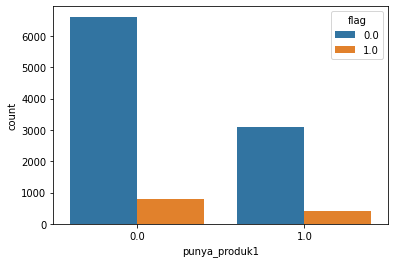

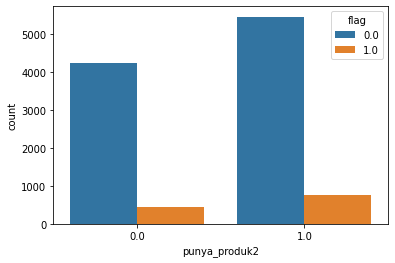

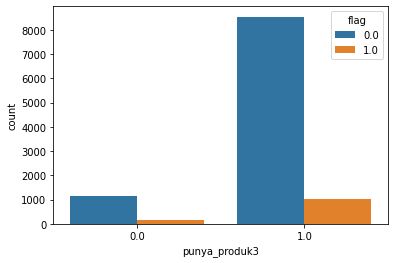

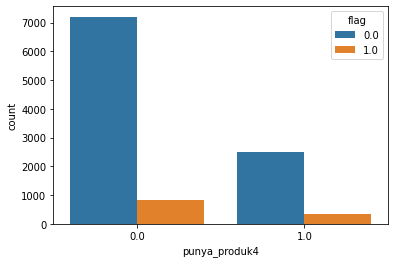

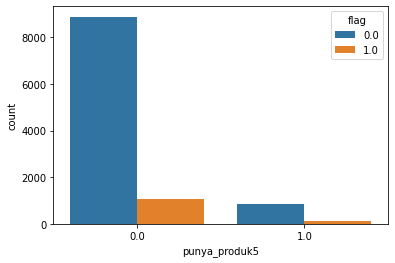

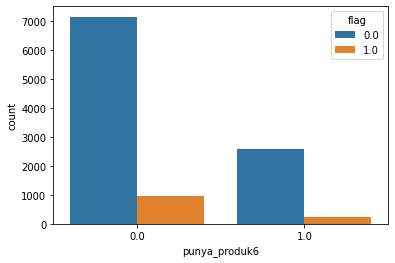

In [ ]:
cols_product = df_trainset.filter(regex='punya_', axis=1).columns
for col in cols_product:
  sns.countplot(data=df_trainset, x=col, hue='flag')
  plt.show()

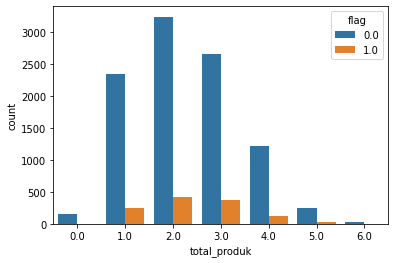

In [ ]:
df_trainset['total_produk'] = df_trainset[cols_product].sum(axis=1)
sns.countplot(data=df_trainset, x='total_produk', hue='flag')

Jika tidak ada produk yang dibeli dan semua dibeli maka pasti flag 0

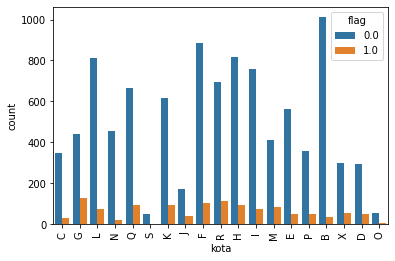

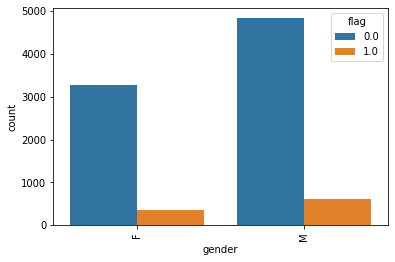

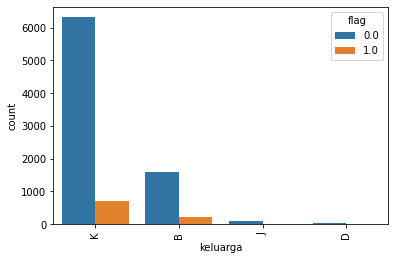

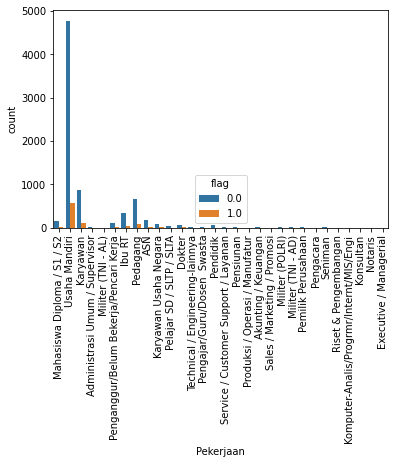

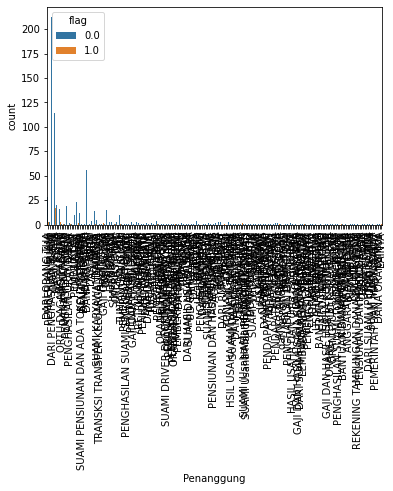

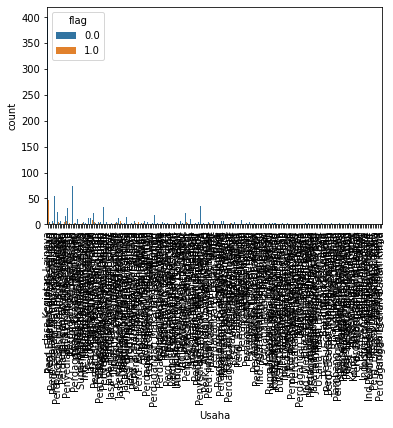

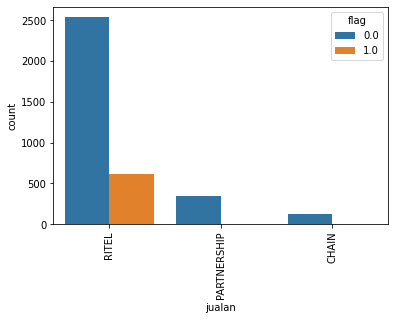

In [ ]:
for col in cols_cat:
  sns.countplot(data=df_trainset, x=col, hue='flag')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
df_crosstab1 = pd.crosstab(index=df_trainset['Usaha'], columns=df_trainset['flag'])
df_crosstab1.sort_values(by=1.0, ascending=False)

flag,0.0,1.0
Usaha,,
Jasa Kegiatan Lainnya,400,46
Jasa Kesehatan Rumah Sakit,37,8
Perdagangan Eceran Lainnya,34,8
Restoran / Rumah Makan,74,7
Perdagangan Eceran Elektronik,6,7
...,...,...
Komputer,1,0
Konst. Rumah Sederhana-BTN,1,0
Konstruksi Gedung Industri,1,0


In [ ]:
len(set(df_crosstab1.index))

204

In [ ]:
df_crosstab4 = pd.crosstab(index=df_testset['Usaha'], columns=df_testset['flag'])
df_crosstab4.sort_values(by=1.0, ascending=False)

flag,0.0,1.0
Usaha,,
Jasa Kegiatan Lainnya,115,10
Jasa Kegiatan Sosial,15,2
Perd. Bahan Konstruksi Lainnya,3,2
Penyediaan Makan Minum Lainnya,9,2
Distribusi Alat Elektronik,1,2
...,...,...
Jasa Real Estate,3,0
Jasa Perjalanan Wisata,1,0
Jasa Penukaran Mata Uang,1,0


In [ ]:
len(set(df_crosstab4.index))

103

In [ ]:
df_crosstab1.sort_values(by=0.0, ascending=False)

flag,0.0,1.0
Usaha,,
Jasa Kegiatan Lainnya,400,46
Restoran / Rumah Makan,74,7
Perd. Eceran Alat Rumah Tangga,55,1
Jasa Kegiatan Sosial,53,5
Jasa Kesehatan Rumah Sakit,37,8
...,...,...
Industri Penggilingan Lainnya,0,1
Bukan Lapangan Usaha Lainnya,0,1
Perd. Eceran Melalui Media,0,1


In [ ]:
df_crosstab1[df_crosstab1[0.0] < df_crosstab1[1.0]]

flag,0.0,1.0
Usaha,,
Bukan Lapangan Usaha Lainnya,0,1
Ind. Alat Transmisi Komunikasi,0,1
Industri Giling Padi & Beras,0,1
Industri Mesin Tekstil,0,1
Industri Penggilingan Lainnya,0,1
Industri Rokok,0,1
Ketenagalistrikan Lainnya,0,1
Pengelolaan Rumah Sakit,1,2
Pengolahan Data,0,1


In [ ]:
df_crosstab2 = pd.crosstab(index=df_trainset['Penanggung'], columns=df_trainset['flag'],dropna=False)
df_crosstab2.sort_values(by=1.0, ascending=False)

flag,0.0,1.0
Penanggung,,
SUAMI,212,22
ORANG TUA,114,17
DARI SUAMI,56,6
ORTU,16,3
ORANGTUA,23,3
...,...,...
HASIL USAHAA,1,0
HIBAH RANG TUA,1,0
HSIL USAHA ALM SUAMI DAN ANAK,1,0


In [ ]:
df_crosstab3 = pd.crosstab(index=df_testset['Penanggung'], columns=df_testset['flag'],dropna=False)
df_crosstab3.sort_values(by=1.0, ascending=False)

flag,0.0,1.0
Penanggung,,
SUAMI,67,7
ORANG TUA,32,5
KELUARGA,2,2
DARI ORANG TUA,3,1
ORTU DAGANG GORDYN,0,1
...,...,...
HASIL DAGANG,2,0
GAJI SUAMI PEG BUMN,1,0
GAJI SUAMI,4,0


In [ ]:
df_crosstab2[df_crosstab2[0.0] < df_crosstab2[1.0]]

flag,0.0,1.0
Penanggung,,
BEASISWA,0,1
Company profit,0,1
DANA YAYASAN,0,1
DARI RUMAH SAKIT,0,1
GAJI PENSIUN,0,1
HASIL SAWIT,0,1
LAINYA,0,1
LEMBAGA KEMASYARAKATAN,0,1
MENABUNG,0,1


In [ ]:
pd.crosstab(index=df_trainset['Penanggung'], columns=df_trainset['flag'], dropna=False)

flag,0.0,1.0
Penanggung,,
(SUAMI) ONEQUA,1,0
12,10,1
ADD DESA,1,0
AGEN BRILINK,2,0
ANAK,1,1
...,...,...
gajih buruh,1,0
orang tua,4,0
ortu,1,0


In [ ]:
df_crosstab2.index

Index(['(SUAMI) ONEQUA', '12', 'ADD DESA', 'AGEN BRILINK', 'ANAK',
       'ANGGARAN DANA DESA', 'ANGGARAN SEKOLAH', 'ANGGOTA', 'APBN', 'BANTUAN',
       ...
       'bisnis', 'dari orangtua', 'dari penghasilan suami', 'dari suami',
       'gaji suami', 'gajih buruh', 'orang tua', 'ortu', 'suami', 'usaha'],
      dtype='object', name='Penanggung', length=200)

In [ ]:
df_crosstab3.index

Index(['12', '5000000', 'ANAK', 'ANAK (POM BENSIN)', 'BANTUAN',
       'BEASISWA LPDP', 'BIAYA PERKARA', 'BKMM', 'DAGANG', 'DANA BANTUAN',
       'DAR SUAMI', 'DARI ANAK', 'DARI DESA', 'DARI ORANG SUAMI',
       'DARI ORANG TUA', 'DARI ORTU', 'DARI SUAMI', 'DONASI', 'DR SUAMI',
       'DR SUAMI/ ROXY SQUARE', 'GAJI', 'GAJI DARI SUAMI',
       'GAJI PNS DAN USAHA', 'GAJI SUAMI', 'GAJI SUAMI PEG BUMN',
       'HASIL DAGANG', 'HASIL SUAMI', 'HASIL USAHA', 'HASIL USAHA SUAMI',
       'Hasil Usaha', 'IKUT ORTU', 'KAS ANGKASA PURA', 'KEBUN GUNUNG GUMITIR',
       'KELUARGA', 'KIRIMAN ORANG TUA', 'LAINNYA', 'MENGURUS RT', 'OMSET',
       'ONLINE SHOP', 'ORANG TUA', 'ORANGTUA', 'ORGTUA', 'ORTU',
       'ORTU DAGANG GORDYN', 'ORTU TOKO KUE LINDA', 'ORTU Usaha Mandiri',
       'ORTU:Usaha Mandiri', 'PEMBAYARAN SIM', 'PEMBERIAN ORG TUA',
       'PEMERINTAH', 'PENGAHSILAN SUAMI', 'PENGHASILAN DARI SUAMI',
       'PENGHASILAN ORANG TUA', 'PENGHASILAN ORANG TUA DAN USAHA SENDIRI',
       'PENGHASILA

Karena usaha mandiri banyak, maka kolom usaha perlu dipertahankan. Selanjutnya kolom tersebut dibagi menjadi jasa dan non jasa.

In [ ]:
df_trainset[df_trainset.Usaha.notnull()]['Pekerjaan'].value_counts()

Series([], Name: Pekerjaan, dtype: int64)

In [ ]:
df_trainset[df_trainset.Pekerjaan.notnull()]['Usaha'].value_counts()

Series([], Name: Usaha, dtype: int64)

In [ ]:
df_trainset[df_trainset.Pekerjaan == 'Usaha Mandiri']['Usaha'].value_counts()

Series([], Name: Usaha, dtype: int64)

1. Kolom usaha tidak kosong, maka pekerjaan kosong dan sebaliknya
2. Kolom pekerjaan yang berisi Usaha Mandiri tidak memiliki Usaha spesifik

Selanjunya isi kolom Pekerjaan dengan Usaha Mandiri karena Pekerjaan bernilai Nan jika Usaha sudah terisi

In [ ]:
df_trainset_fillPekerjaan = df_trainset.copy()
df_trainset_fillPekerjaan.Pekerjaan.fillna(value='Usaha Mandiri', inplace=True)

In [ ]:
df_trainset_fillPekerjaan.Pekerjaan.isnull().sum()

0

[]

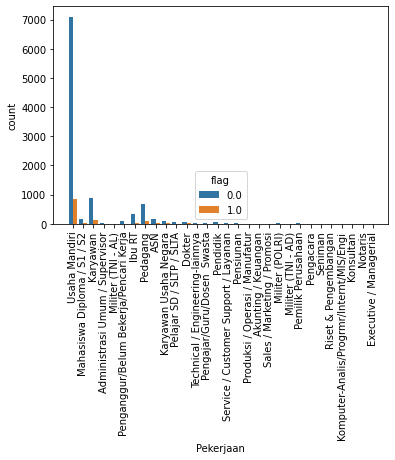

In [ ]:
sns.countplot(data=df_trainset_fillPekerjaan, x='Pekerjaan', hue='flag')
plt.xticks(rotation=90)
plt.plot()

In [ ]:
df_trainset_fixCatCols = df_trainset_fillPekerjaan.copy()
df_trainset_fixCatCols.drop(columns=['Usaha','Penanggung'],inplace=True)

In [ ]:
#fill and drop like trainset for testset

In [ ]:
df_testset['total_produk'] = df_testset[cols_product].sum(axis=1)
df_testset_fillPekerjaan = df_testset.copy()
df_testset_fillPekerjaan.Pekerjaan.fillna(value='Usaha Mandiri', inplace=True)
df_testset_fixCatCols = df_testset_fillPekerjaan.copy()
df_testset_fixCatCols.drop(columns=['Usaha','Penanggung'],inplace=True)

In [ ]:
df_testset_fixCatCols.shape, df_trainset_fixCatCols.shape

((2765, 74), (11059, 74))

# Data Number

average_sisauang_mingguan_1BT


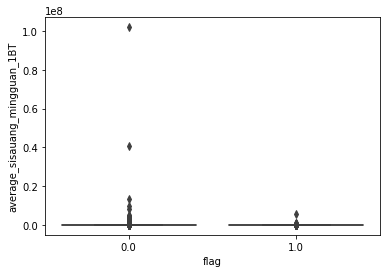

count    1.105900e+04
mean     2.818236e+04
std      1.065601e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.766653e+03
max      1.018928e+08
Name: average_sisauang_mingguan_1BT, dtype: float64
iqr:  1766.6526254999999
upperbound:  4416.631563749999
lowerbound:  -2649.97893825
average_sisauang_mingguan_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


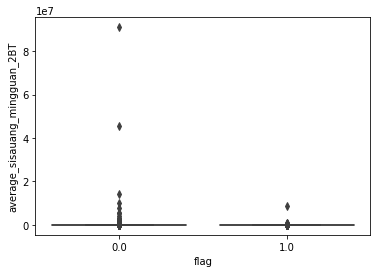

count    1.105900e+04
mean     2.745836e+04
std      9.941917e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.118576e+03
max      9.096792e+07
Name: average_sisauang_mingguan_2BT, dtype: float64
iqr:  1118.5759905
upperbound:  2796.4399762499997
lowerbound:  -1677.86398575
average_sisauang_mingguan_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


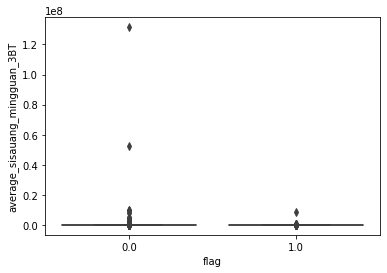

count    1.105900e+04
mean     3.064320e+04
std      1.362533e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.785285e+02
max      1.314524e+08
Name: average_sisauang_mingguan_3BT, dtype: float64
iqr:  678.52845505
upperbound:  1696.3211376250001
lowerbound:  -1017.7926825750001
average_sisauang_mingguan_4BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


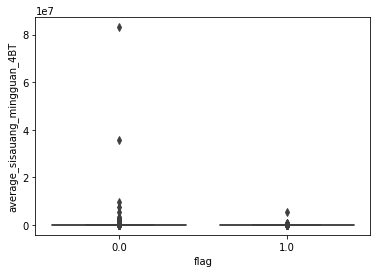

count    1.105900e+04
mean     2.181281e+04
std      8.745539e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.364004e+02
max      8.311209e+07
Name: average_sisauang_mingguan_4BT, dtype: float64
iqr:  336.40039755
upperbound:  841.000993875
lowerbound:  -504.60059632499997
average_sisauang_mingguan_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


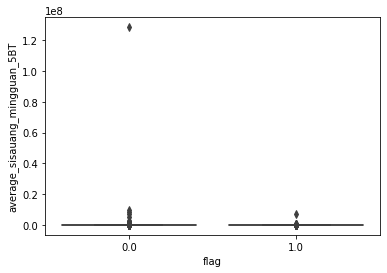

count    1.105900e+04
mean     2.277387e+04
std      1.233153e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.615196e+01
max      1.283997e+08
Name: average_sisauang_mingguan_5BT, dtype: float64
iqr:  86.15196218
upperbound:  215.37990545
lowerbound:  -129.22794327
average_sisauang_mingguan_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


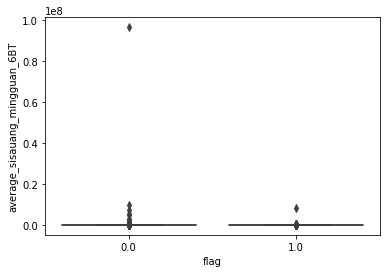

count    1.105900e+04
mean     1.941452e+04
std      9.335926e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.658573e+07
Name: average_sisauang_mingguan_6BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_akhir_1BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


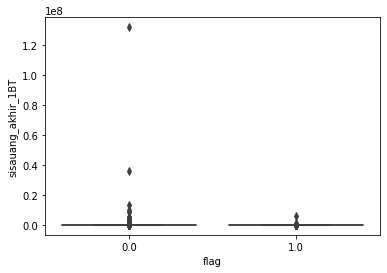

count    1.105900e+04
mean     3.109745e+04
std      1.319782e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.495334e+03
max      1.321269e+08
Name: sisauang_akhir_1BT, dtype: float64
iqr:  1495.334336
upperbound:  3738.3358399999997
lowerbound:  -2243.001504
sisauang_akhir_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


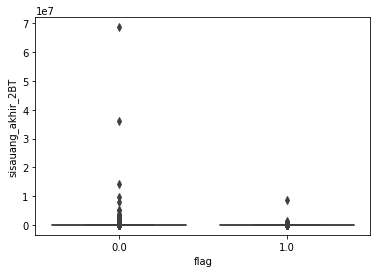

count    1.105900e+04
mean     2.539160e+04
std      7.737964e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.143791e+02
max      6.867630e+07
Name: sisauang_akhir_2BT, dtype: float64
iqr:  914.3791479500001
upperbound:  2285.947869875
lowerbound:  -1371.568721925
sisauang_akhir_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


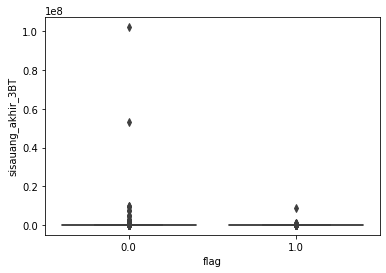

count    1.105900e+04
mean     2.944786e+04
std      1.119813e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.423685e+02
max      1.021546e+08
Name: sisauang_akhir_3BT, dtype: float64
iqr:  442.36846
upperbound:  1105.9211500000001
lowerbound:  -663.55269
sisauang_akhir_4BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


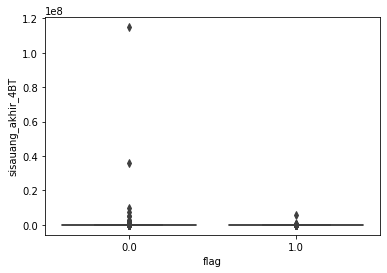

count    1.105900e+04
mean     2.511442e+04
std      1.154070e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.680703e+02
max      1.147758e+08
Name: sisauang_akhir_4BT, dtype: float64
iqr:  168.07033185
upperbound:  420.175829625
lowerbound:  -252.105497775
sisauang_akhir_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


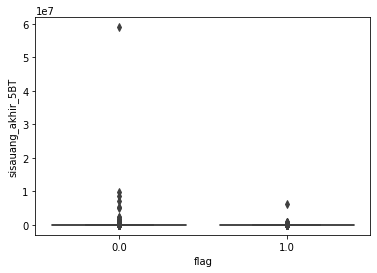

count    1.105900e+04
mean     1.721708e+04
std      5.886775e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.899599e+07
Name: sisauang_akhir_5BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_akhir_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


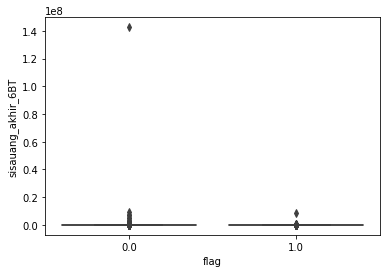

count    1.105900e+04
mean     2.468287e+04
std      1.368072e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.426014e+08
Name: sisauang_akhir_6BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_tertahan_1BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


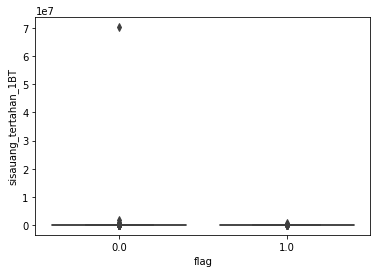

count    1.105900e+04
mean     7.096736e+03
std      6.688158e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.030230e+07
Name: sisauang_tertahan_1BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_tertahan_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


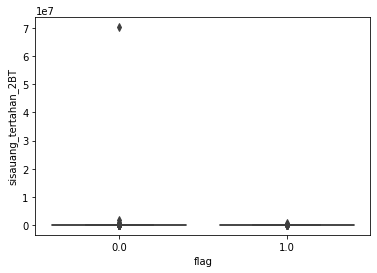

count    1.105900e+04
mean     6.991963e+03
std      6.688040e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.030230e+07
Name: sisauang_tertahan_2BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_tertahan_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


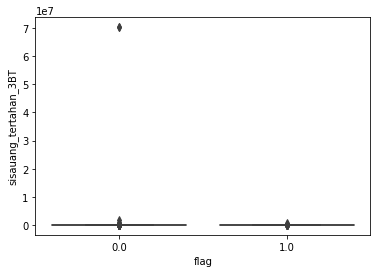

count    1.105900e+04
mean     1.340020e+04
std      9.455816e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.030230e+07
Name: sisauang_tertahan_3BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


sisauang_tertahan_4BT


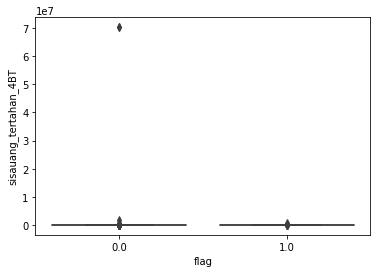

count    1.105900e+04
mean     1.323296e+04
std      9.455465e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.030230e+07
Name: sisauang_tertahan_4BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_tertahan_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


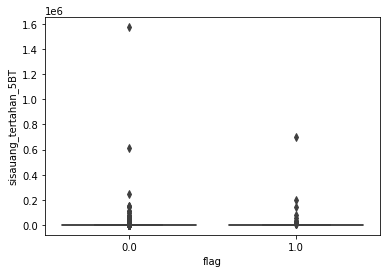

count    1.105900e+04
mean     5.689775e+02
std      1.813675e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.573389e+06
Name: sisauang_tertahan_5BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_tertahan_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


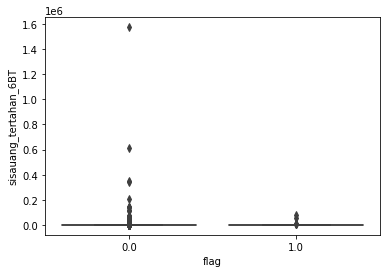

count    1.105900e+04
mean     4.951926e+02
std      1.723346e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.573389e+06
Name: sisauang_tertahan_6BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_tersedia_1BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


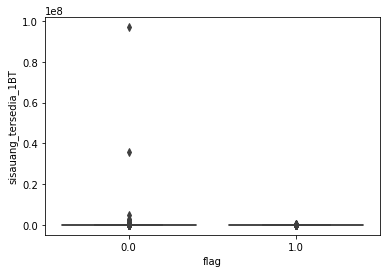

count    1.105900e+04
mean     1.965831e+04
std      9.850072e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.084290e+03
max      9.697502e+07
Name: sisauang_tersedia_1BT, dtype: float64
iqr:  1084.2899674999999
upperbound:  2710.7249187499997
lowerbound:  -1626.4349512499998
sisauang_tersedia_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


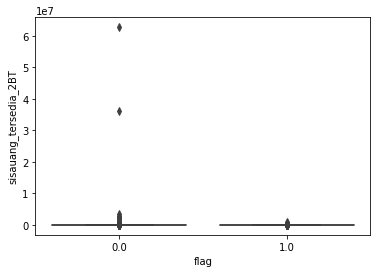

count    1.105900e+04
mean     1.663196e+04
std      6.918745e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.871876e+02
max      6.272017e+07
Name: sisauang_tersedia_2BT, dtype: float64
iqr:  587.1875844
upperbound:  1467.968961
lowerbound:  -880.7813765999999
sisauang_tersedia_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


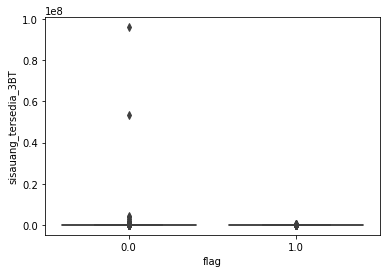

count    1.105900e+04
mean     2.081804e+04
std      1.046608e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.956776e+02
max      9.598541e+07
Name: sisauang_tersedia_3BT, dtype: float64
iqr:  195.6775942
upperbound:  489.1939855
lowerbound:  -293.5163913
sisauang_tersedia_4BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


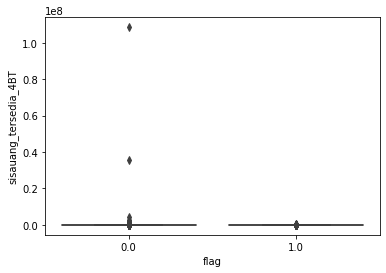

count    1.105900e+04
mean     1.942917e+04
std      1.087938e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.084991e+08
Name: sisauang_tersedia_4BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_tersedia_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


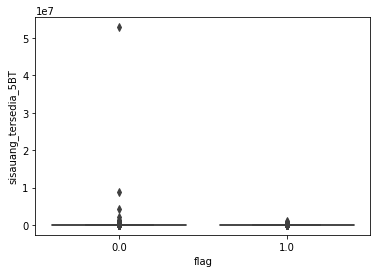

count    1.105900e+04
mean     1.165922e+04
std      5.128788e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.285320e+07
Name: sisauang_tersedia_5BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisauang_tersedia_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


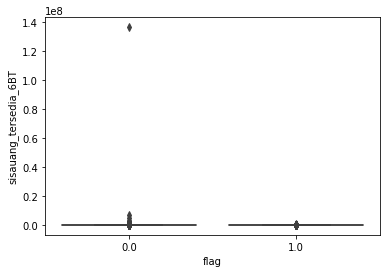

count    1.105900e+04
mean     1.911033e+04
std      1.300887e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.364428e+08
Name: sisauang_tersedia_6BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisa_hutang_1BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


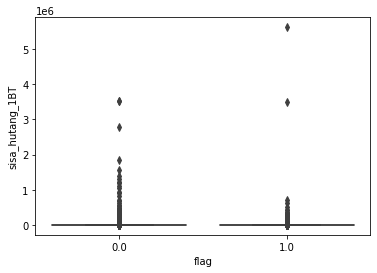

count    1.105900e+04
mean     1.475220e+04
std      1.008089e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.620817e+06
Name: sisa_hutang_1BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisa_hutang_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


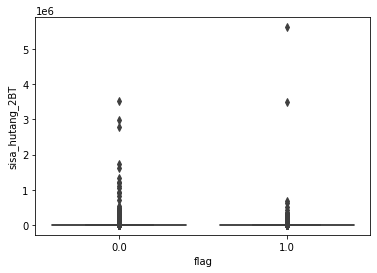

count    1.105900e+04
mean     1.335393e+04
std      9.724967e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.623981e+06
Name: sisa_hutang_2BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisa_hutang_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


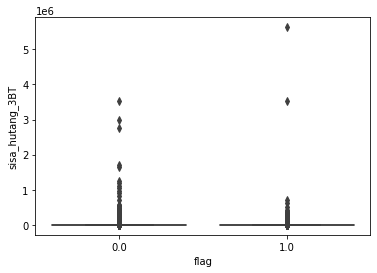

count    1.105900e+04
mean     1.234998e+04
std      9.618241e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.627144e+06
Name: sisa_hutang_3BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisa_hutang_4BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


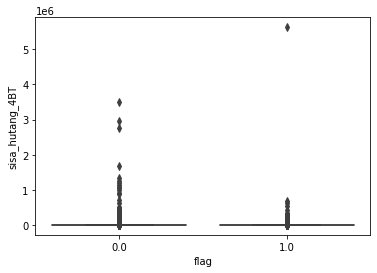

count    1.105900e+04
mean     1.116002e+04
std      8.943095e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.630284e+06
Name: sisa_hutang_4BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisa_hutang_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


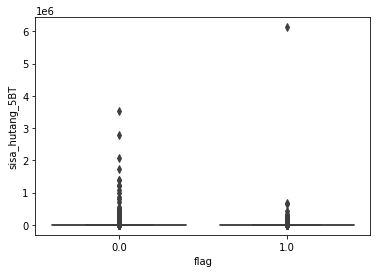

count    1.105900e+04
mean     1.055859e+04
std      8.957986e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.123959e+06
Name: sisa_hutang_5BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
sisa_hutang_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


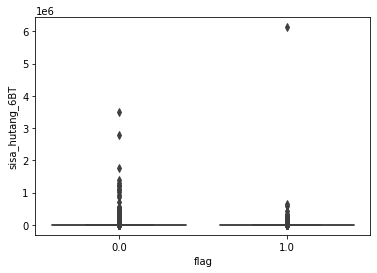

count    1.105900e+04
mean     1.023699e+04
std      8.862457e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.127141e+06
Name: sisa_hutang_6BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
jumlah_pembayaran_hutang_1BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


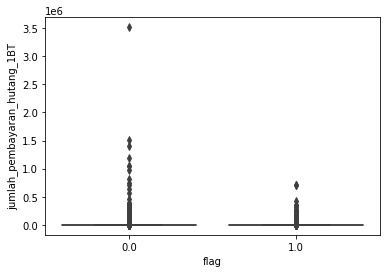

count    1.105900e+04
mean     7.514989e+03
std      5.583347e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.513772e+06
Name: jumlah_pembayaran_hutang_1BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
jumlah_pembayaran_hutang_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


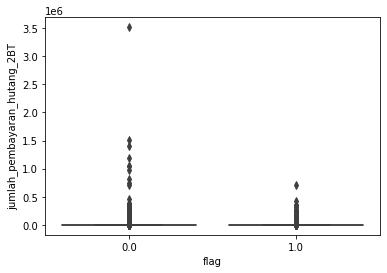

count    1.105900e+04
mean     6.845917e+03
std      5.435763e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.513772e+06
Name: jumlah_pembayaran_hutang_2BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
jumlah_pembayaran_hutang_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


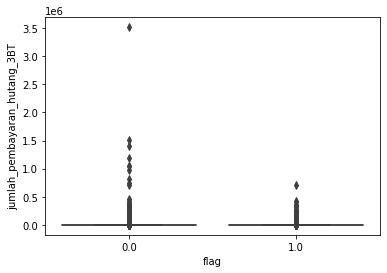

count    1.105900e+04
mean     6.403365e+03
std      5.401153e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.513772e+06
Name: jumlah_pembayaran_hutang_3BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
jumlah_pembayaran_hutang_4BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


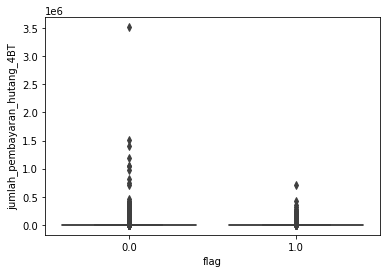

count    1.105900e+04
mean     5.977058e+03
std      5.337733e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.513772e+06
Name: jumlah_pembayaran_hutang_4BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
jumlah_pembayaran_hutang_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


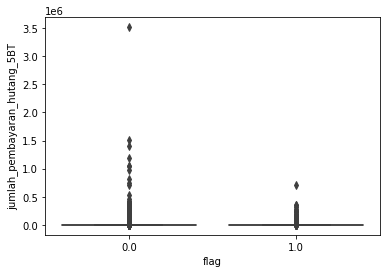

count    1.105900e+04
mean     5.803560e+03
std      5.334150e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.513772e+06
Name: jumlah_pembayaran_hutang_5BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
jumlah_pembayaran_hutang_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


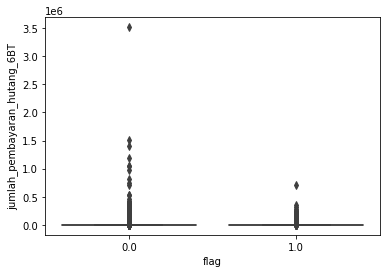

count    1.105900e+04
mean     5.631211e+03
std      5.317198e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.513772e+06
Name: jumlah_pembayaran_hutang_6BT, dtype: float64
iqr:  0.0
upperbound:  0.0
lowerbound:  0.0
jumlah_pengeluaran_1BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


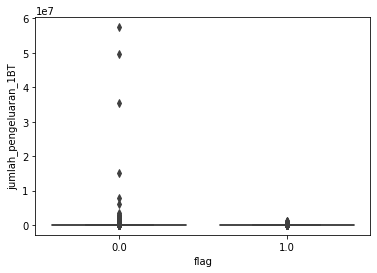

count    1.105900e+04
mean     4.089835e+04
std      8.229725e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.476825e+03
max      5.745784e+07
Name: jumlah_pengeluaran_1BT, dtype: float64
iqr:  9476.8250265
upperbound:  23692.062566250002
lowerbound:  -14215.23753975
jumlah_pengeluaran_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


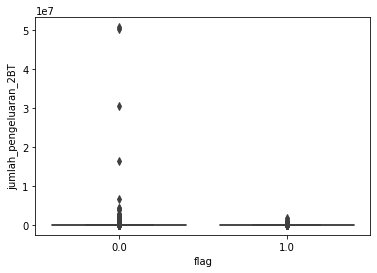

count    1.105900e+04
mean     3.817698e+04
std      7.682760e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.022111e+03
max      5.075053e+07
Name: jumlah_pengeluaran_2BT, dtype: float64
iqr:  8022.1114665000005
upperbound:  20055.27866625
lowerbound:  -12033.167199750002
jumlah_pengeluaran_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


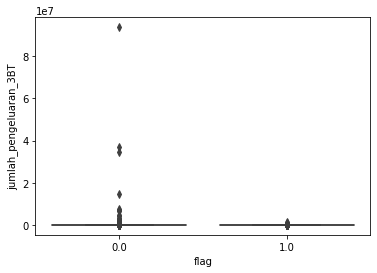

count    1.105900e+04
mean     4.065571e+04
std      1.034351e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.357998e+03
max      9.372912e+07
Name: jumlah_pengeluaran_3BT, dtype: float64
iqr:  6357.9980665
upperbound:  15894.99516625
lowerbound:  -9536.99709975
jumlah_pengeluaran_4BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


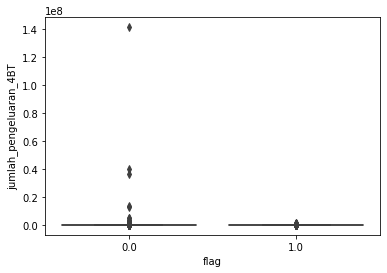

count    1.105900e+04
mean     4.353534e+04
std      1.457950e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.315508e+03
max      1.415363e+08
Name: jumlah_pengeluaran_4BT, dtype: float64
iqr:  5315.5081625
upperbound:  13288.770406250002
lowerbound:  -7973.26224375
jumlah_pengeluaran_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


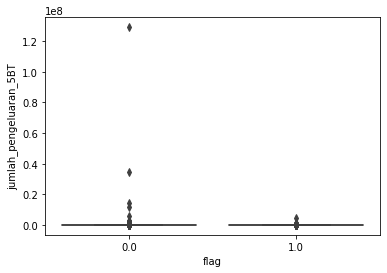

count    1.105900e+04
mean     3.789753e+04
std      1.288939e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.018366e+03
max      1.291729e+08
Name: jumlah_pengeluaran_5BT, dtype: float64
iqr:  4018.3663875
upperbound:  10045.91596875
lowerbound:  -6027.54958125
jumlah_pengeluaran_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


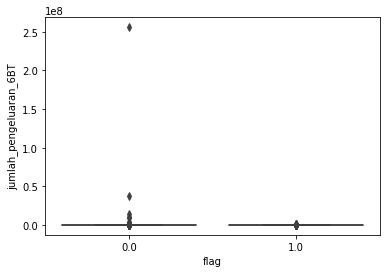

count    1.105900e+04
mean     4.844001e+04
std      2.468817e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.349784e+03
max      2.560004e+08
Name: jumlah_pengeluaran_6BT, dtype: float64
iqr:  3349.7835
upperbound:  8374.45875
lowerbound:  -5024.67525
jumlah_pemasukan_1BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


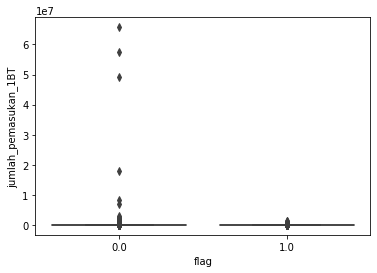

count    1.105900e+04
mean     4.328561e+04
std      9.797977e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.534315e+03
max      6.572808e+07
Name: jumlah_pemasukan_1BT, dtype: float64
iqr:  9534.3145735
upperbound:  23835.78643375
lowerbound:  -14301.47186025
jumlah_pemasukan_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


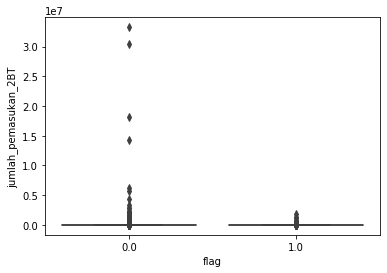

count    1.105900e+04
mean     3.379802e+04
std      5.012901e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.314424e+03
max      3.326561e+07
Name: jumlah_pemasukan_2BT, dtype: float64
iqr:  8314.4242125
upperbound:  20786.060531249997
lowerbound:  -12471.63631875
jumlah_pemasukan_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


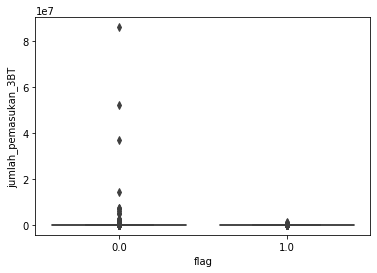

count    1.105900e+04
mean     4.242857e+04
std      1.041813e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.634245e+03
max      8.595698e+07
Name: jumlah_pemasukan_3BT, dtype: float64
iqr:  6634.245113999999
upperbound:  16585.612784999998
lowerbound:  -9951.367671
jumlah_pemasukan_4BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


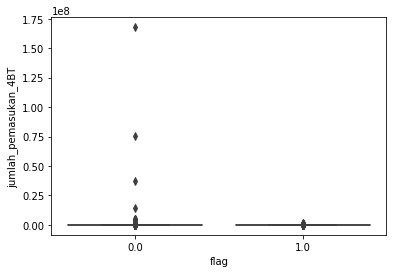

count    1.105900e+04
mean     4.853874e+04
std      1.793687e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.372795e+03
max      1.677714e+08
Name: jumlah_pemasukan_4BT, dtype: float64
iqr:  5372.7953105
upperbound:  13431.988276249998
lowerbound:  -8059.1929657499995
jumlah_pemasukan_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


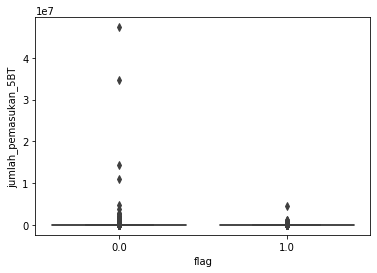

count    1.105900e+04
mean     3.065075e+04
std      5.952026e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.210666e+03
max      4.728462e+07
Name: jumlah_pemasukan_5BT, dtype: float64
iqr:  4210.666444
upperbound:  10526.666110000002
lowerbound:  -6315.999666000001
jumlah_pemasukan_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


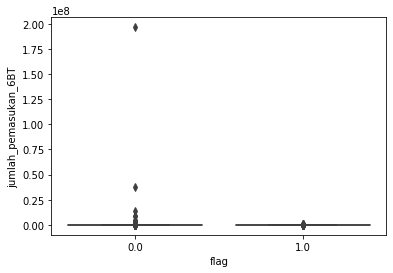

count    1.105900e+04
mean     4.384316e+04
std      1.913206e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.495534e+03
max      1.964591e+08
Name: jumlah_pemasukan_6BT, dtype: float64
iqr:  3495.534238
upperbound:  8738.835595
lowerbound:  -5243.301357
frekuensi_pengeluaran_1BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


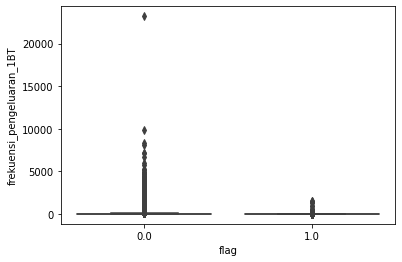

count    11059.000000
mean       113.698436
std        468.953265
min          0.000000
25%          0.000000
50%          5.000000
75%         35.000000
max      23205.000000
Name: frekuensi_pengeluaran_1BT, dtype: float64
iqr:  35.0
upperbound:  87.5
lowerbound:  -52.5
frekuensi_pengeluaran_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


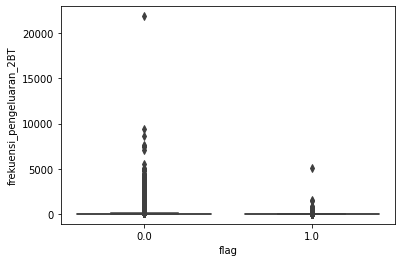

count    11059.000000
mean       107.929288
std        454.244705
min          0.000000
25%          0.000000
50%          3.000000
75%         31.000000
max      21874.000000
Name: frekuensi_pengeluaran_2BT, dtype: float64
iqr:  31.0
upperbound:  77.5
lowerbound:  -46.5
frekuensi_pengeluaran_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


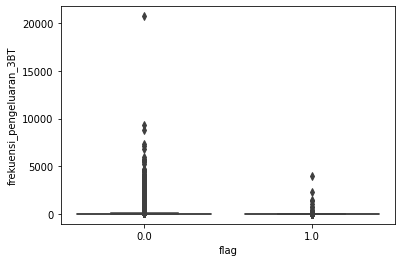

count    11059.000000
mean       103.711999
std        445.735568
min          0.000000
25%          0.000000
50%          2.000000
75%         27.000000
max      20733.000000
Name: frekuensi_pengeluaran_3BT, dtype: float64
iqr:  27.0
upperbound:  67.5
lowerbound:  -40.5
frekuensi_pengeluaran_4BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


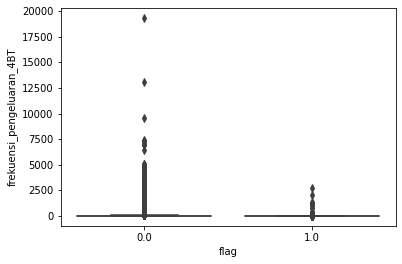

count    11059.000000
mean       101.491817
std        447.472845
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max      19304.000000
Name: frekuensi_pengeluaran_4BT, dtype: float64
iqr:  25.0
upperbound:  62.5
lowerbound:  -37.5
frekuensi_pengeluaran_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


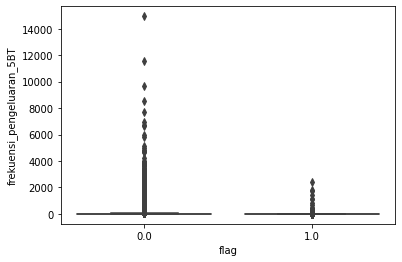

count    11059.000000
mean        96.429967
std        422.525973
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max      14943.000000
Name: frekuensi_pengeluaran_5BT, dtype: float64
iqr:  23.0
upperbound:  57.5
lowerbound:  -34.5
frekuensi_pengeluaran_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


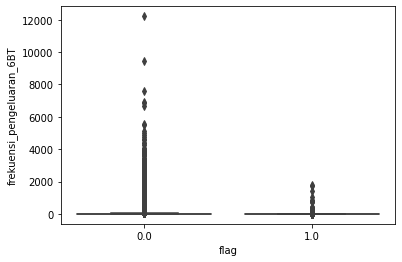

count    11059.000000
mean        89.672846
std        384.838604
min          0.000000
25%          0.000000
50%          0.000000
75%         21.000000
max      12215.000000
Name: frekuensi_pengeluaran_6BT, dtype: float64
iqr:  21.0
upperbound:  52.5
lowerbound:  -31.5
frekuensi_pemasukan_1BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


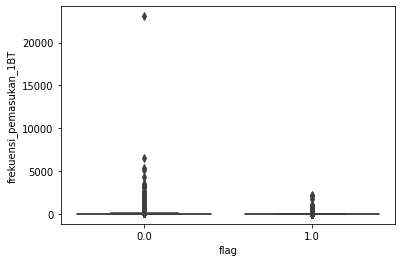

count    11059.000000
mean        57.752600
std        301.501284
min          0.000000
25%          0.000000
50%          2.000000
75%         25.000000
max      23082.000000
Name: frekuensi_pemasukan_1BT, dtype: float64
iqr:  25.0
upperbound:  62.5
lowerbound:  -37.5
frekuensi_pemasukan_2BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


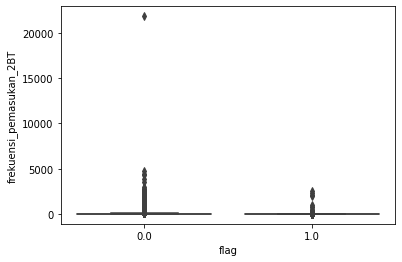

count    11059.000000
mean        55.387648
std        284.921281
min          0.000000
25%          0.000000
50%          1.000000
75%         22.000000
max      21853.000000
Name: frekuensi_pemasukan_2BT, dtype: float64
iqr:  22.0
upperbound:  55.0
lowerbound:  -33.0
frekuensi_pemasukan_3BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


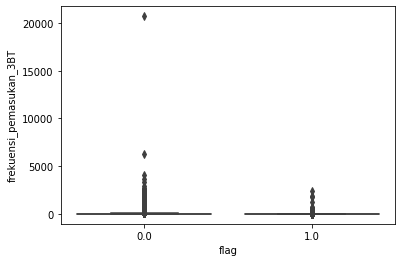

count    11059.000000
mean        51.984357
std        272.411872
min          0.000000
25%          0.000000
50%          0.000000
75%         19.000000
max      20709.000000
Name: frekuensi_pemasukan_3BT, dtype: float64
iqr:  19.0
upperbound:  47.5
lowerbound:  -28.5
frekuensi_pemasukan_4BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


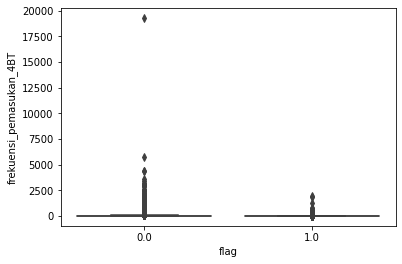

count    11059.000000
mean        51.748711
std        268.896075
min          0.000000
25%          0.000000
50%          0.000000
75%         17.000000
max      19270.000000
Name: frekuensi_pemasukan_4BT, dtype: float64
iqr:  17.0
upperbound:  42.5
lowerbound:  -25.5
frekuensi_pemasukan_5BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


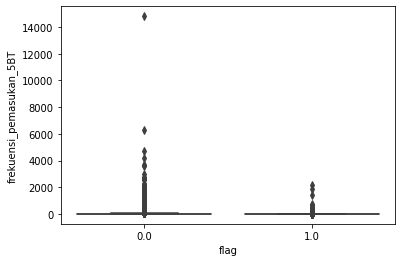

count    11059.000000
mean        49.291166
std        238.954966
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max      14804.000000
Name: frekuensi_pemasukan_5BT, dtype: float64
iqr:  16.0
upperbound:  40.0
lowerbound:  -24.0
frekuensi_pemasukan_6BT


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


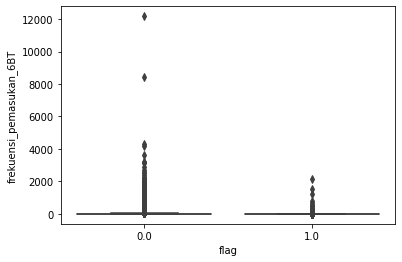

count    11059.000000
mean        46.466679
std        225.929259
min          0.000000
25%          0.000000
50%          0.000000
75%         14.000000
max      12173.000000
Name: frekuensi_pemasukan_6BT, dtype: float64
iqr:  14.0
upperbound:  35.0
lowerbound:  -21.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
cols_BT = df_trainset_fixCatCols.filter(regex='BT$', axis=1).columns
data = df_trainset_fixCatCols
df_trainset_removeOutlier = df_trainset_fixCatCols.copy()
df_testset_removeOutlier = df_testset_fixCatCols.copy()
for col in cols_BT:
  print(col)

  #box plot
  sns.boxplot(data=data, x='flag', y=col)
  plt.show()

  #statistic
  print(data[col].describe())
  q1 = np.percentile(data[col],25)
  q3 = np.percentile(data[col],75)
  iqr = q3-q1
  print('iqr: ',iqr)
  upperbound = q3+1.5*iqr
  lowerbound = q1-1.5*iqr
  print('upperbound: ',upperbound)
  print('lowerbound: ',lowerbound)
  upperlimit = np.max(data[col][data[col]<=upperbound])
  lowerlimit = np.min(data[col][data[col]<=lowerbound])

  #change outlier values with upper/lowerbound
  df_trainset_removeOutlier[col].loc[df_trainset_removeOutlier[col] > upperbound] = upperbound
  df_trainset_removeOutlier[col].loc[df_trainset_removeOutlier[col] < lowerbound] = lowerbound
  df_testset_removeOutlier[col].loc[df_testset_removeOutlier[col] > upperbound] = upperbound
  df_testset_removeOutlier[col].loc[df_testset_removeOutlier[col] < lowerbound] = lowerbound

average_sisauang_mingguan_1BT


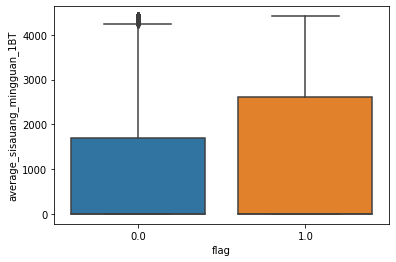

average_sisauang_mingguan_2BT


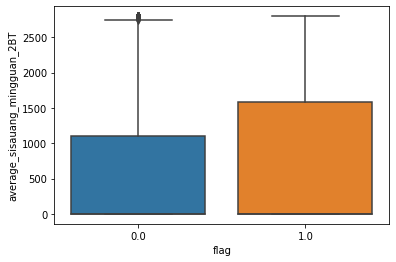

average_sisauang_mingguan_3BT


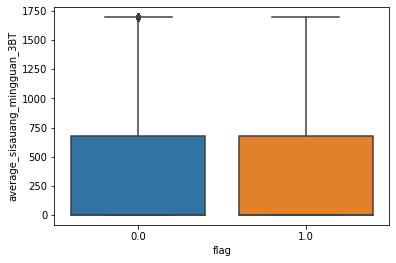

average_sisauang_mingguan_4BT


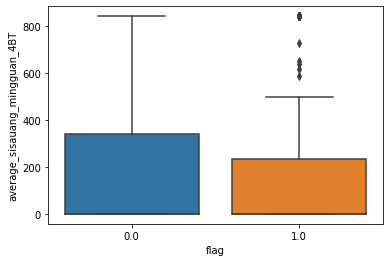

average_sisauang_mingguan_5BT


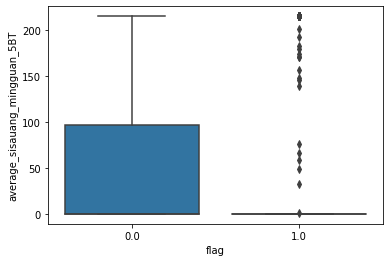

average_sisauang_mingguan_6BT


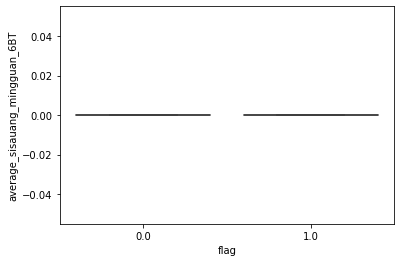

sisauang_akhir_1BT


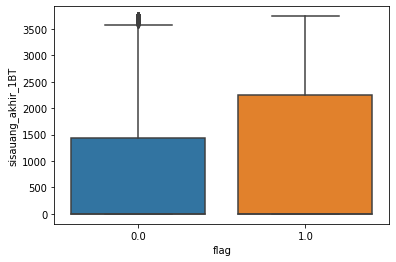

sisauang_akhir_2BT


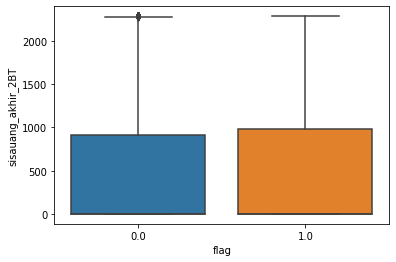

sisauang_akhir_3BT


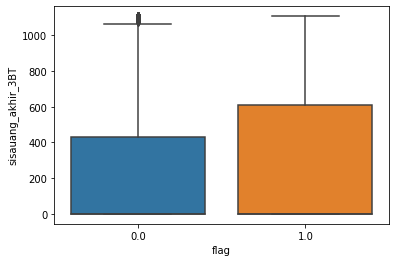

sisauang_akhir_4BT


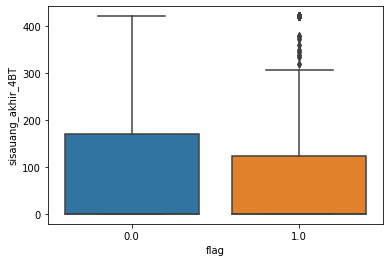

sisauang_akhir_5BT


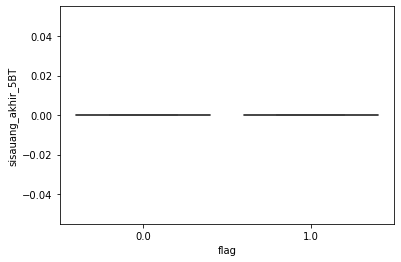

sisauang_akhir_6BT


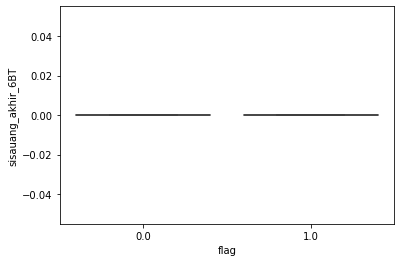

sisauang_tertahan_1BT


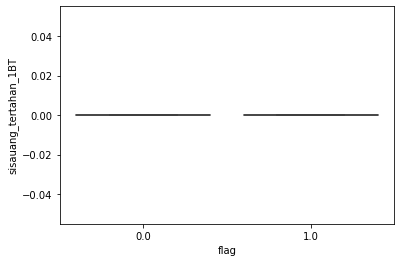

sisauang_tertahan_2BT


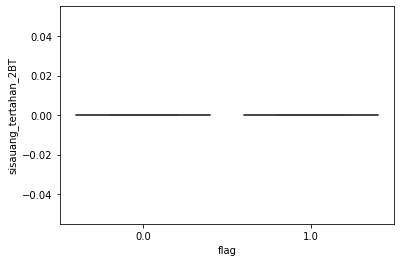

sisauang_tertahan_3BT


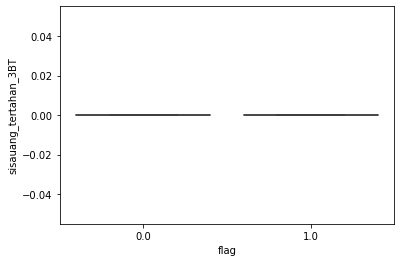

sisauang_tertahan_4BT


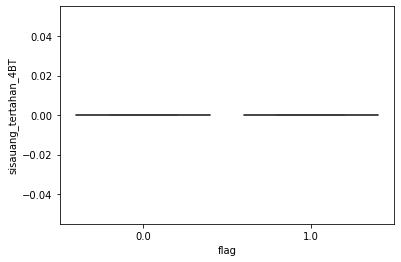

sisauang_tertahan_5BT


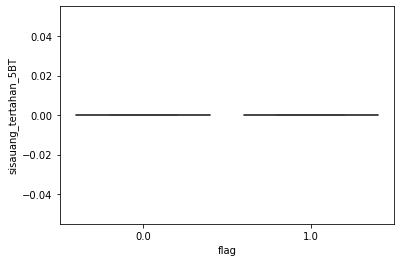

sisauang_tertahan_6BT


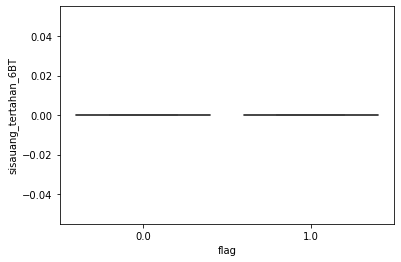

sisauang_tersedia_1BT


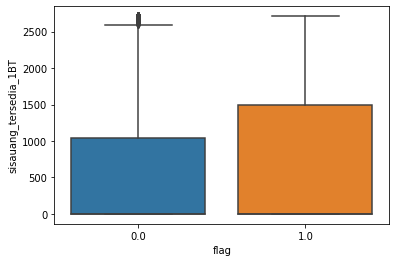

sisauang_tersedia_2BT


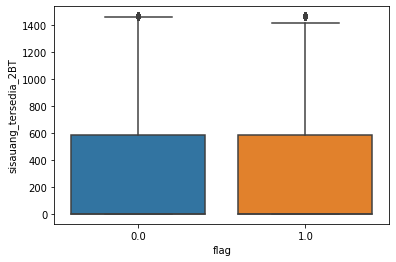

sisauang_tersedia_3BT


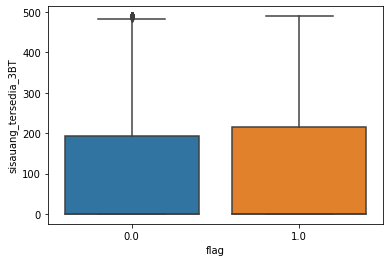

sisauang_tersedia_4BT


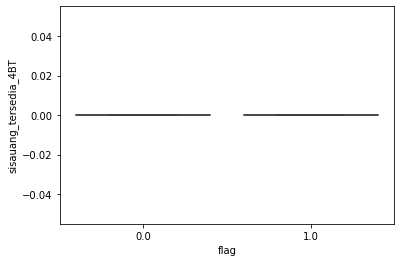

sisauang_tersedia_5BT


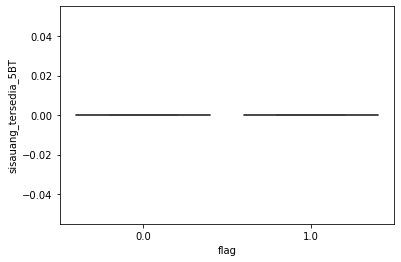

sisauang_tersedia_6BT


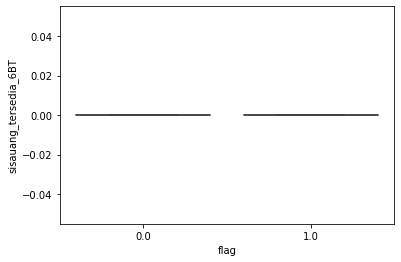

sisa_hutang_1BT


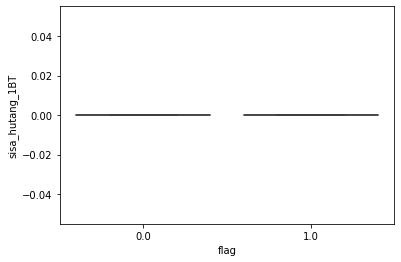

sisa_hutang_2BT


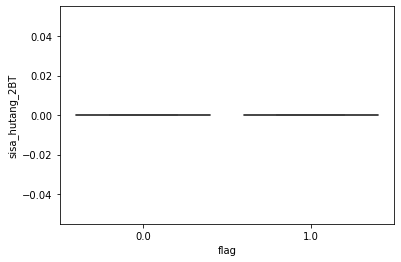

sisa_hutang_3BT


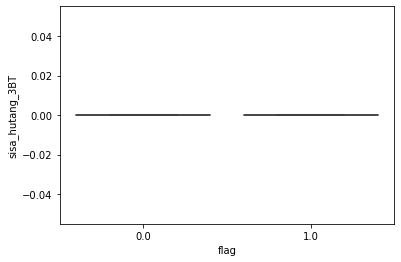

sisa_hutang_4BT


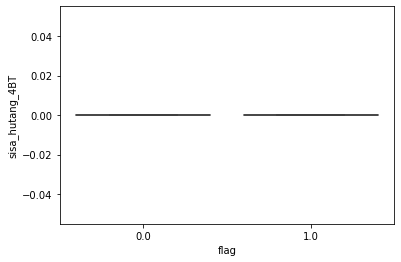

sisa_hutang_5BT


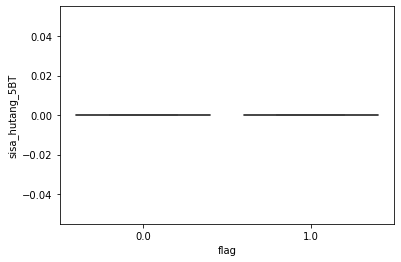

sisa_hutang_6BT


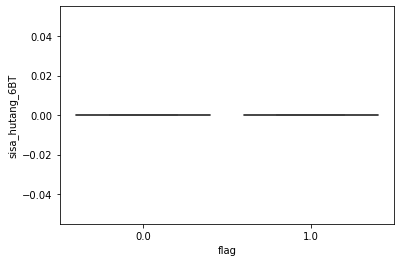

jumlah_pembayaran_hutang_1BT


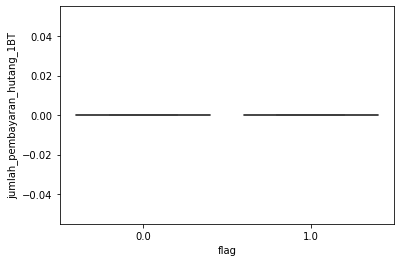

jumlah_pembayaran_hutang_2BT


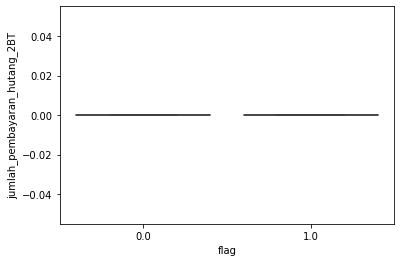

jumlah_pembayaran_hutang_3BT


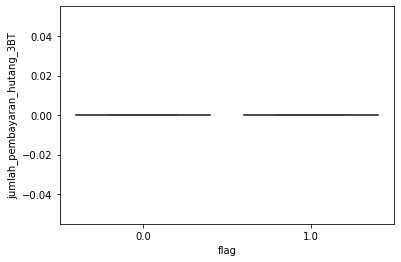

jumlah_pembayaran_hutang_4BT


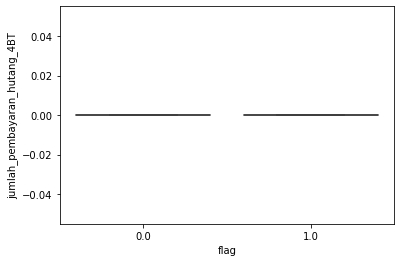

jumlah_pembayaran_hutang_5BT


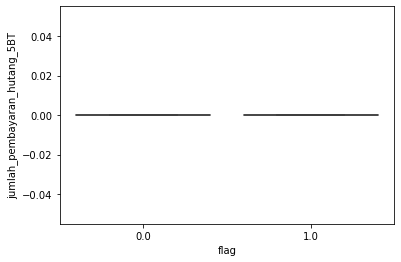

jumlah_pembayaran_hutang_6BT


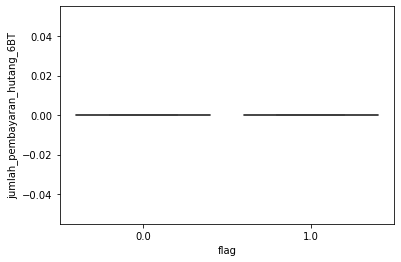

jumlah_pengeluaran_1BT


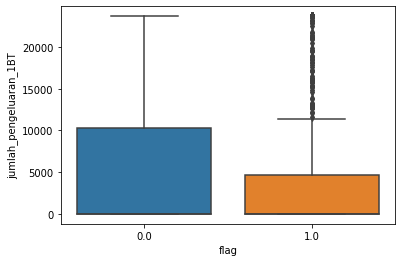

jumlah_pengeluaran_2BT


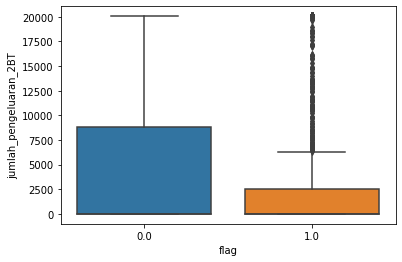

jumlah_pengeluaran_3BT


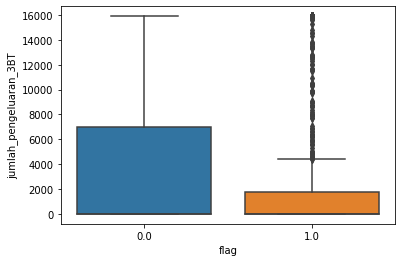

jumlah_pengeluaran_4BT


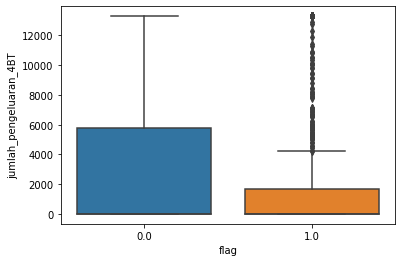

jumlah_pengeluaran_5BT


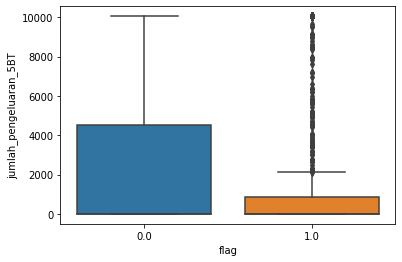

jumlah_pengeluaran_6BT


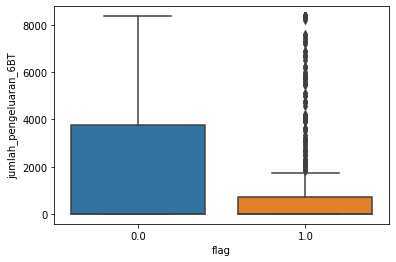

jumlah_pemasukan_1BT


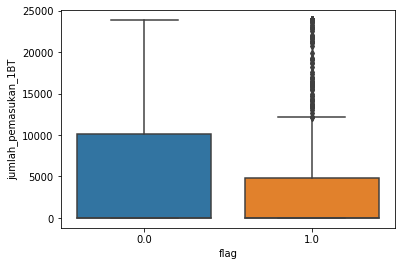

jumlah_pemasukan_2BT


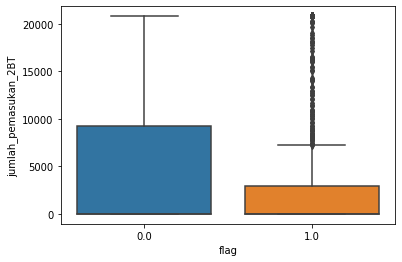

jumlah_pemasukan_3BT


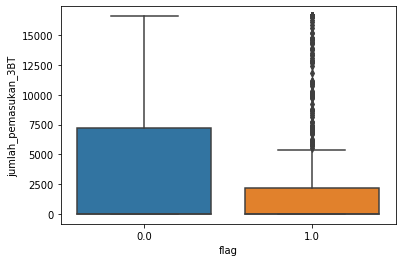

jumlah_pemasukan_4BT


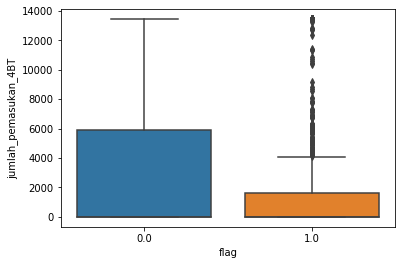

jumlah_pemasukan_5BT


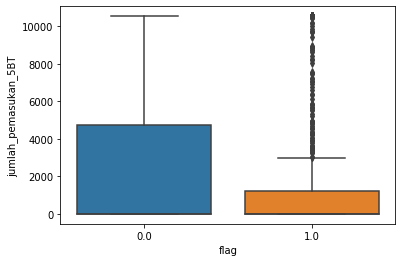

jumlah_pemasukan_6BT


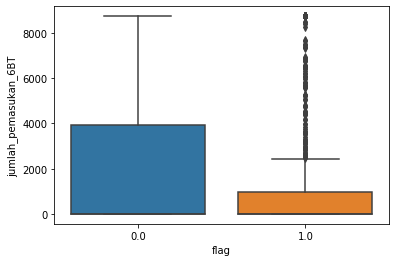

frekuensi_pengeluaran_1BT


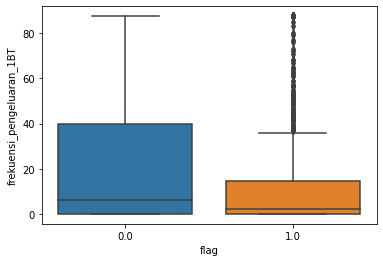

frekuensi_pengeluaran_2BT


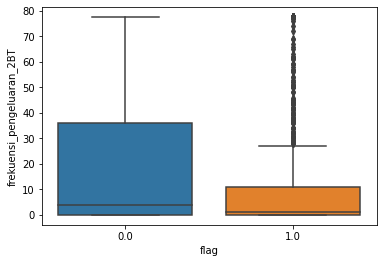

frekuensi_pengeluaran_3BT


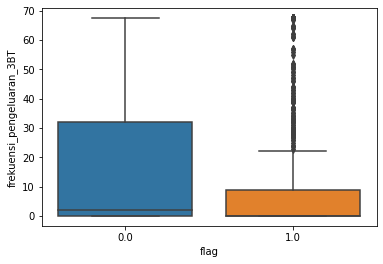

frekuensi_pengeluaran_4BT


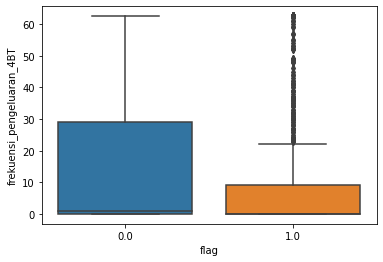

frekuensi_pengeluaran_5BT


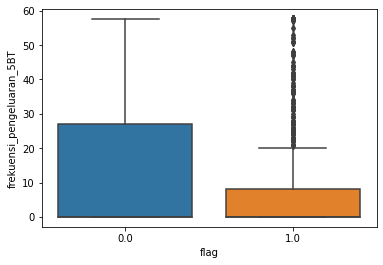

frekuensi_pengeluaran_6BT


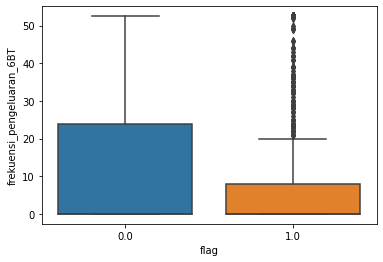

frekuensi_pemasukan_1BT


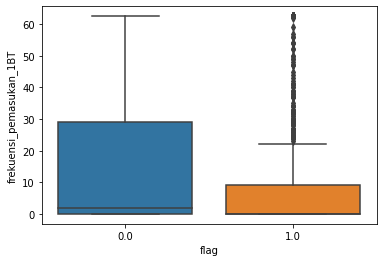

frekuensi_pemasukan_2BT


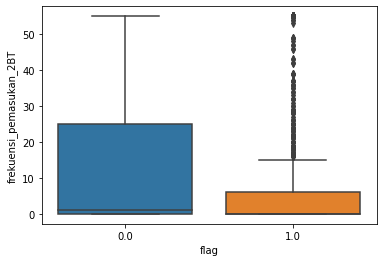

frekuensi_pemasukan_3BT


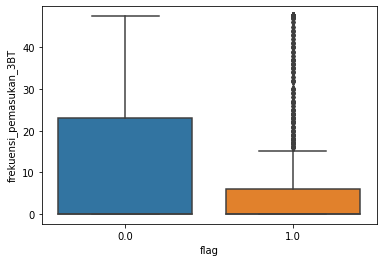

frekuensi_pemasukan_4BT


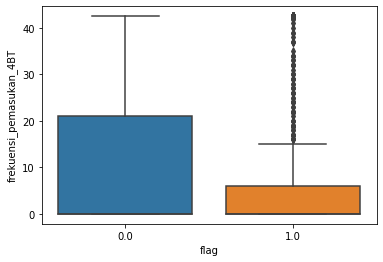

frekuensi_pemasukan_5BT


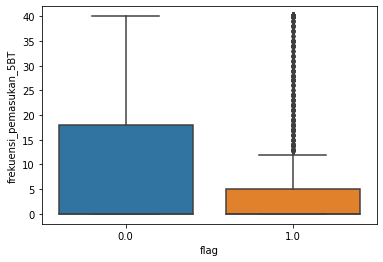

frekuensi_pemasukan_6BT


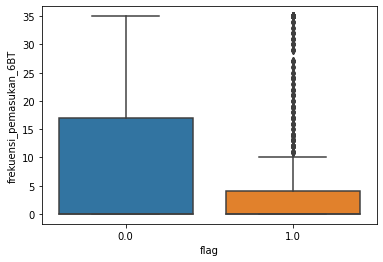

In [ ]:
data = df_trainset_removeOutlier
for col in cols_BT:
  print(col)

  #box plot
  sns.boxplot(data=data, x='flag', y=col)
  plt.show()

In [ ]:
import re
string = 'average_sisauang_mingguan_1BT'
re.sub('_[0-9]BT$','',string)

'average_sisauang_mingguan'

In [ ]:
cols_unique_BT = []
for col in cols_BT:
  cols_unique_BT.append(re.sub('_[0-9]BT$','',col))
cols_unique_BT = set(cols_unique_BT)
cols_unique_BT

{'average_sisauang_mingguan',
 'frekuensi_pemasukan',
 'frekuensi_pengeluaran',
 'jumlah_pemasukan',
 'jumlah_pembayaran_hutang',
 'jumlah_pengeluaran',
 'sisa_hutang',
 'sisauang_akhir',
 'sisauang_tersedia',
 'sisauang_tertahan'}

In [ ]:
cols_num = df_trainset_fixCatCols.select_dtypes(include='number').columns
cols_num

Index(['umur', 'punya_produk1', 'punya_produk2', 'punya_produk3',
       'punya_produk4', 'punya_produk5', 'punya_produk6',
       'average_sisauang_mingguan_1BT', 'average_sisauang_mingguan_2BT',
       'average_sisauang_mingguan_3BT', 'average_sisauang_mingguan_4BT',
       'average_sisauang_mingguan_5BT', 'average_sisauang_mingguan_6BT',
       'sisauang_akhir_1BT', 'sisauang_akhir_2BT', 'sisauang_akhir_3BT',
       'sisauang_akhir_4BT', 'sisauang_akhir_5BT', 'sisauang_akhir_6BT',
       'sisauang_tertahan_1BT', 'sisauang_tertahan_2BT',
       'sisauang_tertahan_3BT', 'sisauang_tertahan_4BT',
       'sisauang_tertahan_5BT', 'sisauang_tertahan_6BT',
       'sisauang_tersedia_1BT', 'sisauang_tersedia_2BT',
       'sisauang_tersedia_3BT', 'sisauang_tersedia_4BT',
       'sisauang_tersedia_5BT', 'sisauang_tersedia_6BT', 'sisa_hutang_1BT',
       'sisa_hutang_2BT', 'sisa_hutang_3BT', 'sisa_hutang_4BT',
       'sisa_hutang_5BT', 'sisa_hutang_6BT', 'jumlah_pembayaran_hutang_1BT',
       'j

In [ ]:
cols_num_bin = ['flag','umur']
cols_num_bin.extend(cols_product)
cols_num_bin

['flag',
 'umur',
 'punya_produk1',
 'punya_produk2',
 'punya_produk3',
 'punya_produk4',
 'punya_produk5',
 'punya_produk6']

In [ ]:
cols_num_notbin = list(cols_num.copy())
for col in cols_num_bin:
  cols_num_notbin.remove(col)
cols_num_notbin

['average_sisauang_mingguan_1BT',
 'average_sisauang_mingguan_2BT',
 'average_sisauang_mingguan_3BT',
 'average_sisauang_mingguan_4BT',
 'average_sisauang_mingguan_5BT',
 'average_sisauang_mingguan_6BT',
 'sisauang_akhir_1BT',
 'sisauang_akhir_2BT',
 'sisauang_akhir_3BT',
 'sisauang_akhir_4BT',
 'sisauang_akhir_5BT',
 'sisauang_akhir_6BT',
 'sisauang_tertahan_1BT',
 'sisauang_tertahan_2BT',
 'sisauang_tertahan_3BT',
 'sisauang_tertahan_4BT',
 'sisauang_tertahan_5BT',
 'sisauang_tertahan_6BT',
 'sisauang_tersedia_1BT',
 'sisauang_tersedia_2BT',
 'sisauang_tersedia_3BT',
 'sisauang_tersedia_4BT',
 'sisauang_tersedia_5BT',
 'sisauang_tersedia_6BT',
 'sisa_hutang_1BT',
 'sisa_hutang_2BT',
 'sisa_hutang_3BT',
 'sisa_hutang_4BT',
 'sisa_hutang_5BT',
 'sisa_hutang_6BT',
 'jumlah_pembayaran_hutang_1BT',
 'jumlah_pembayaran_hutang_2BT',
 'jumlah_pembayaran_hutang_3BT',
 'jumlah_pembayaran_hutang_4BT',
 'jumlah_pembayaran_hutang_5BT',
 'jumlah_pembayaran_hutang_6BT',
 'jumlah_pengeluaran_1BT',
 

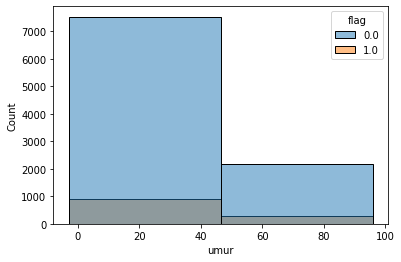

In [ ]:
sns.histplot(data=data, x='umur', hue='flag', bins=2)

In [ ]:
df_trainset_groupAge = df_trainset_removeOutlier.copy()
df_testset_groupAge = df_testset_removeOutlier.copy()
def groupAge(x):
  if x < 37:
    return 'group_a'
  if x >= 37:
    return 'group_b'
  else:
    return x
df_trainset_groupAge['umur'] = df_trainset_groupAge['umur'].apply(lambda x:groupAge(x))
df_trainset_groupAge.drop(columns=cols_product,inplace=True)
df_testset_groupAge['umur'] = df_testset_groupAge['umur'].apply(lambda x:groupAge(x))
df_testset_groupAge.drop(columns=cols_product,inplace=True)

In [ ]:
df_trainset_groupAge

,umur,kota,gender,keluarga,Pekerjaan,jualan,average_sisauang_mingguan_1BT,average_sisauang_mingguan_2BT,average_sisauang_mingguan_3BT,average_sisauang_mingguan_4BT,...,frekuensi_pengeluaran_5BT,frekuensi_pengeluaran_6BT,frekuensi_pemasukan_1BT,frekuensi_pemasukan_2BT,frekuensi_pemasukan_3BT,frekuensi_pemasukan_4BT,frekuensi_pemasukan_5BT,frekuensi_pemasukan_6BT,flag,total_produk
0,group_a,C,NaN,NaN,Usaha Mandiri,NaN,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,group_a,G,F,K,Mahasiswa Diploma / S1 / S2,NaN,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,group_a,L,M,K,Usaha Mandiri,NaN,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,group_b,N,M,K,Karyawan,NaN,0.000000,0.000000,0.000000,0.000000,...,2.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,2.0
4,group_a,Q,F,K,Usaha Mandiri,NaN,4416.631564,2796.439976,1696.321138,841.000994,...,37.0,26.0,38.0,19.0,24.0,42.5,40.0,35.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,group_a,H,F,K,Usaha Mandiri,RITEL,4416.631564,2796.439976,1696.321138,841.000994,...,0.0,1.0,62.5,40.0,47.5,42.5,40.0,35.0,0.0,2.0
11055,group_a,B,F,B,Mahasiswa Diploma / S1 / S2,NaN,0.000000,0.000000,1183.991384,841.000994,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0
11056,group_b,Q,M,K,Usaha Mandiri,NaN,649.992334,2796.439976,0.000000,0.000000,...,54.0,52.0,17.0,25.0,17.0,14.0,21.0,35.0,0.0,3.0
11057,group_b,D,M,K,Usaha Mandiri,NaN,0.000000,0.000000,0.000000,0.000000,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [ ]:
df_trainset_groupAge.jualan.isnull().sum()/len(df_trainset_groupAge)

0.6713084365675016

In [ ]:
df_trainset_groupAge[df_trainset_groupAge.jualan.notnull()]['Pekerjaan'].value_counts()

Usaha Mandiri                             2513
Karyawan                                   336
Pedagang                                   252
Ibu RT                                     164
Mahasiswa Diploma / S1 / S2                 75
ASN                                         73
Karyawan Usaha Negara                       46
Penganggur/Belum Bekerja/Pencari Kerja      43
Dokter                                      24
Pendidik                                    24
Pensiunan                                   13
Pelajar SD / SLTP / SLTA                    12
Militer (POLRI)                             11
Pengajar/Guru/Dosen  Swasta                  9
Service / Customer Support / Layanan         6
Akunting / Keuangan                          6
Militer (TNI - AD)                           6
Pemilik Perusahaan                           5
Technical / Engineering-lainnya              4
Produksi / Operasi / Manufatur               3
Militer (TNI - AL)                           2
Pengacara    

In [ ]:
df_trainset_groupAge.jualan.fillna(value='UNKNOWN',inplace=True)
df_testset_groupAge.jualan.fillna(value='UNKNOWN',inplace=True)

In [ ]:
df_trainset_fillJualan = df_trainset_groupAge.copy()
df_testset_fillJualan = df_testset_groupAge.copy()

In [ ]:
cols_remove = df_trainset_fillJualan[cols_BT].loc[:, df_trainset_fillJualan[cols_BT].std() <= 0.1].columns
cols_remove

Index(['average_sisauang_mingguan_6BT', 'sisauang_akhir_5BT',
       'sisauang_akhir_6BT', 'sisauang_tertahan_1BT', 'sisauang_tertahan_2BT',
       'sisauang_tertahan_3BT', 'sisauang_tertahan_4BT',
       'sisauang_tertahan_5BT', 'sisauang_tertahan_6BT',
       'sisauang_tersedia_4BT', 'sisauang_tersedia_5BT',
       'sisauang_tersedia_6BT', 'sisa_hutang_1BT', 'sisa_hutang_2BT',
       'sisa_hutang_3BT', 'sisa_hutang_4BT', 'sisa_hutang_5BT',
       'sisa_hutang_6BT', 'jumlah_pembayaran_hutang_1BT',
       'jumlah_pembayaran_hutang_2BT', 'jumlah_pembayaran_hutang_3BT',
       'jumlah_pembayaran_hutang_4BT', 'jumlah_pembayaran_hutang_5BT',
       'jumlah_pembayaran_hutang_6BT'],
      dtype='object')

In [ ]:
df_trainset_dropLowSTD = df_trainset_fillJualan.copy()
df_trainset_dropLowSTD.drop(columns=cols_remove, inplace=True)
df_testset_dropLowSTD = df_testset_fillJualan.copy()
df_testset_dropLowSTD.drop(columns=cols_remove, inplace=True)

In [ ]:
df_trainset_dropLowSTD.shape,df_testset_dropLowSTD.shape

((11059, 44), (2765, 44))

# Fill Nan Remain

In [ ]:
X_train = df_trainset_dropLowSTD.drop(columns='flag')
y_train = df_trainset_dropLowSTD.flag
df_trainset_num = X_train.select_dtypes(include='number')
df_trainset_cat = X_train.select_dtypes(exclude='number')
cols_num = df_trainset_num.columns
cols_cat = df_trainset_cat.columns

In [ ]:
X_test = df_testset_dropLowSTD.drop(columns='flag')
y_test = df_testset_dropLowSTD.flag
df_testset_num = X_test.select_dtypes(include='number')
df_testset_cat = X_test.select_dtypes(exclude='number')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

In [ ]:
oe = OrdinalEncoder()
knn = KNNImputer(n_neighbors=5)
rs = RobustScaler()

In [ ]:
#transform category cols with ordinal encoder
df_trainset_oe = pd.DataFrame(oe.fit_transform(df_trainset_cat), columns=cols_cat)
#fill nan with knn
df_trainset_knn = pd.concat([df_trainset_num, df_trainset_oe], axis=1)
df_trainset_knn = pd.DataFrame(knn.fit_transform(df_trainset_knn), columns=df_trainset_knn.columns)
#invers category cols after orinal encoder
df_trainset_invoe = np.round(df_trainset_knn[cols_cat])
df_trainset_invoe = pd.DataFrame(oe.inverse_transform(df_trainset_invoe), columns=cols_cat)
#scale number cols with robust scaler
df_trainset_rs = df_trainset_knn[cols_num]
df_trainset_rs = pd.DataFrame(rs.fit_transform(df_trainset_rs), columns=cols_num)
df_trainset_rs

,average_sisauang_mingguan_1BT,average_sisauang_mingguan_2BT,average_sisauang_mingguan_3BT,average_sisauang_mingguan_4BT,average_sisauang_mingguan_5BT,sisauang_akhir_1BT,sisauang_akhir_2BT,sisauang_akhir_3BT,sisauang_akhir_4BT,sisauang_tersedia_1BT,...,frekuensi_pengeluaran_4BT,frekuensi_pengeluaran_5BT,frekuensi_pengeluaran_6BT,frekuensi_pemasukan_1BT,frekuensi_pemasukan_2BT,frekuensi_pemasukan_3BT,frekuensi_pemasukan_4BT,frekuensi_pemasukan_5BT,frekuensi_pemasukan_6BT,total_produk
0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,-0.08,-0.045455,0.000000,0.000000,0.0000,0.0,-1.0
1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,-0.08,-0.045455,0.000000,0.000000,0.0000,0.0,-1.0
2,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.80,-0.045455,0.000000,0.000000,0.0000,0.0,0.0
3,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.04,0.086957,0.333333,-0.08,-0.045455,0.000000,0.000000,0.0000,0.5,0.0
4,2.500000,2.5,2.50000,2.5,2.5,2.5,2.5,2.5,2.5,0.0,...,1.44,1.608696,1.238095,1.44,0.818182,1.263158,2.500000,2.5000,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,2.500000,2.5,2.50000,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,0.16,0.000000,0.047619,2.42,1.772727,2.500000,2.500000,2.5000,2.5,0.0
11055,0.000000,0.0,1.74494,2.5,0.0,0.0,0.0,0.0,2.5,0.0,...,0.36,0.000000,0.000000,-0.08,-0.045455,0.000000,0.176471,0.0000,0.0,0.0
11056,0.367923,2.5,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.16,2.347826,2.476190,0.60,1.090909,0.894737,0.823529,1.3125,2.5,1.0
11057,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.000000,0.095238,-0.08,-0.045455,0.000000,0.000000,0.0000,0.0,1.0


In [ ]:
#transform category cols with ordinal encoder
df_testset_oe = pd.DataFrame(oe.transform(df_testset_cat), columns=cols_cat)
#fill nan with knn
df_testset_knn = pd.concat([df_testset_num, df_testset_oe], axis=1)
df_testset_knn = pd.DataFrame(knn.transform(df_testset_knn), columns=df_testset_knn.columns)
#invers category cols after orinal encoder
df_testset_invoe = np.round(df_testset_knn[cols_cat])
df_testset_invoe = pd.DataFrame(oe.inverse_transform(df_testset_invoe), columns=cols_cat)
#scale number cols with robust scaler
df_testset_rs = df_testset_knn[cols_num]
df_testset_rs = pd.DataFrame(rs.transform(df_testset_rs), columns=cols_num)
df_testset_rs

,average_sisauang_mingguan_1BT,average_sisauang_mingguan_2BT,average_sisauang_mingguan_3BT,average_sisauang_mingguan_4BT,average_sisauang_mingguan_5BT,sisauang_akhir_1BT,sisauang_akhir_2BT,sisauang_akhir_3BT,sisauang_akhir_4BT,sisauang_tersedia_1BT,...,frekuensi_pengeluaran_4BT,frekuensi_pengeluaran_5BT,frekuensi_pengeluaran_6BT,frekuensi_pemasukan_1BT,frekuensi_pemasukan_2BT,frekuensi_pemasukan_3BT,frekuensi_pemasukan_4BT,frekuensi_pemasukan_5BT,frekuensi_pemasukan_6BT,total_produk
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.20,0.304348,0.333333,0.96,1.181818,0.736842,1.117647,1.0000,0.571429,-1.0
1,0.000000,2.500000,2.500000,0.0,0.0,0.000000,0.939503,2.500000,0.0,0.000000,...,0.00,0.000000,0.000000,0.20,0.136364,0.631579,0.000000,0.0000,0.000000,1.0
2,0.000000,0.185562,1.804058,2.5,2.5,0.000000,0.000000,1.177273,2.5,0.000000,...,0.16,0.043478,0.190476,-0.04,-0.045455,0.000000,0.000000,0.0000,0.000000,2.0
3,2.294597,2.500000,2.500000,2.5,2.5,2.500000,0.000000,2.500000,2.5,2.500000,...,0.76,1.130435,1.095238,1.44,2.454545,2.105263,2.500000,2.5000,2.500000,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,1.80,2.391304,2.285714,2.42,2.454545,2.500000,2.500000,2.5000,2.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,2.342001,2.500000,2.500000,2.5,2.5,2.303474,2.500000,2.500000,2.5,2.500000,...,1.76,1.043478,1.285714,0.40,0.636364,1.157895,0.823529,1.1875,0.785714,1.0
2761,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.000000,0.88,0.818182,1.105263,1.294118,1.4375,1.428571,-1.0
2762,0.715674,0.000000,0.000000,2.5,2.5,1.107436,0.000000,0.000000,2.5,1.527255,...,0.28,0.608696,0.380952,1.00,0.272727,0.736842,0.000000,0.1250,0.142857,3.0
2763,1.381392,0.000000,0.000000,0.0,0.0,2.500000,0.000000,0.000000,0.0,2.500000,...,0.00,0.000000,0.000000,0.32,-0.045455,0.000000,0.000000,0.0000,0.000000,3.0


In [ ]:
df_trainset_knn.isnull().sum().sum(), df_testset_knn.isnull().sum().sum()

(0, 0)

In [ ]:
df_trainset_knn.isnull().shape, df_testset_knn.isnull().shape

((11059, 43), (2765, 43))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
df_trainset_ohe = pd.DataFrame(ohe.fit_transform(df_trainset_invoe).toarray(), columns=ohe.get_feature_names_out(cols_cat))
df_trainset_ohe

,umur_group_a,umur_group_b,kota_B,kota_C,kota_D,kota_E,kota_F,kota_G,kota_H,kota_I,...,Pekerjaan_Riset & Pengembangan,Pekerjaan_Sales / Marketing / Promosi,Pekerjaan_Seniman,Pekerjaan_Service / Customer Support / Layanan,Pekerjaan_Technical / Engineering-lainnya,Pekerjaan_Usaha Mandiri,jualan_CHAIN,jualan_PARTNERSHIP,jualan_RITEL,jualan_UNKNOWN
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11055,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11056,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11057,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_testset_ohe = pd.DataFrame(ohe.transform(df_testset_invoe).toarray(), columns=ohe.get_feature_names_out(cols_cat))
df_testset_ohe

,umur_group_a,umur_group_b,kota_B,kota_C,kota_D,kota_E,kota_F,kota_G,kota_H,kota_I,...,Pekerjaan_Riset & Pengembangan,Pekerjaan_Sales / Marketing / Promosi,Pekerjaan_Seniman,Pekerjaan_Service / Customer Support / Layanan,Pekerjaan_Technical / Engineering-lainnya,Pekerjaan_Usaha Mandiri,jualan_CHAIN,jualan_PARTNERSHIP,jualan_RITEL,jualan_UNKNOWN
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2761,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2762,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Feature Engineering

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(df_trainset_rs)

PCA()

In [ ]:
len(df_trainset_rs.columns)

37

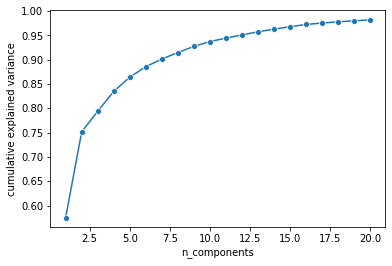

In [ ]:
sns.lineplot(x=np.arange(1,21,1), y = pca.explained_variance_ratio_[:20].cumsum(), marker='o')
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca = PCA(n_components = 12)

In [ ]:
cols_pca = []
for i in range(1,13,1):
  cols_pca.append('PCA_{}'.format(i))
cols_pca

['PCA_1',
 'PCA_2',
 'PCA_3',
 'PCA_4',
 'PCA_5',
 'PCA_6',
 'PCA_7',
 'PCA_8',
 'PCA_9',
 'PCA_10',
 'PCA_11',
 'PCA_12']

In [ ]:
df_trainset_pca = pd.DataFrame(pca.fit_transform(df_trainset_rs), columns=cols_pca)
df_trainset_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12
0,-3.813745,-0.241994,0.443844,-0.388261,-0.892269,0.071170,-0.048935,-0.161476,0.004980,0.007971,-0.006941,-0.016604
1,-3.813745,-0.241994,0.443844,-0.388261,-0.892269,0.071170,-0.048935,-0.161476,0.004980,0.007971,-0.006941,-0.016604
2,-3.558805,-0.388071,0.108240,-0.023362,-0.075584,0.123059,0.138079,0.243468,-0.081197,-0.076550,0.040714,0.140623
3,-3.546554,-0.402962,0.091980,-0.242057,-0.003309,-0.070442,-0.155141,0.096872,0.049496,-0.019170,0.045357,-0.158266
4,2.789401,2.248589,-4.363349,-1.189637,0.636914,-0.938657,1.067585,1.534131,-1.262655,0.369096,-0.381442,-1.519980
...,...,...,...,...,...,...,...,...,...,...,...,...
11054,4.489553,4.279388,-2.441120,-0.739110,-2.090742,-0.860254,0.989945,3.471885,-0.587713,0.258706,0.345656,0.826500
11055,-1.607466,0.791666,0.636376,-2.215803,0.513554,0.798088,1.639346,-0.539815,-0.772632,2.308128,1.404207,-0.716618
11056,3.744011,-3.173791,1.927827,0.170781,0.766041,-0.741394,-2.303112,-0.053363,0.018582,-0.598170,-1.050235,-1.862640
11057,-3.598304,-0.269509,0.032597,0.022886,0.962597,0.029087,-0.091961,0.257237,0.013922,0.060126,0.001485,0.012761


In [ ]:
df_testset_pca = pd.DataFrame(pca.transform(df_testset_rs), columns=cols_pca)
df_testset_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12
0,-2.433523,-1.435777,-0.656639,-0.110983,-1.524271,0.143093,0.364702,0.809453,-0.226985,0.009558,-0.007887,0.079294
1,-0.244072,2.132443,-0.413173,-0.159290,0.620842,3.634816,-1.429554,0.471444,1.961819,0.490703,-1.012189,0.177511
2,-0.843765,2.304560,-0.398287,-3.264654,2.461991,0.509806,1.192369,0.395616,-0.035246,-1.217189,0.376933,-0.696241
3,8.398785,1.505006,2.412769,-0.961181,-0.990549,-0.763098,2.080634,2.098370,1.349999,-0.189881,-0.690412,-1.123887
4,1.982828,-4.504447,-2.410393,0.076106,-0.364828,-0.425869,-0.033499,1.639344,0.000421,0.437261,-0.004655,-0.382261
...,...,...,...,...,...,...,...,...,...,...,...,...
2760,5.651495,3.991816,-0.747174,-1.759065,0.456666,-1.260816,-1.064063,-0.408749,0.592369,0.911514,0.293880,-0.140486
2761,-2.592836,-1.313260,-0.564725,-0.362120,-1.716946,-0.162375,0.289632,1.787545,-0.163885,0.120312,0.017821,-0.076864
2762,1.024450,0.551466,-0.489802,0.975679,2.901825,-0.042657,3.887688,-1.285880,-1.430292,-0.698742,0.476658,0.306782
2763,-2.291799,1.145946,-0.788059,2.532451,2.278080,-1.912558,1.257032,0.149729,1.089647,0.370450,-0.249760,0.090487


In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components = 12)

In [ ]:
cols_nmf = []
for i in range(1,13,1):
  cols_nmf.append('NMF_{}'.format(i))
cols_nmf

['NMF_1',
 'NMF_2',
 'NMF_3',
 'NMF_4',
 'NMF_5',
 'NMF_6',
 'NMF_7',
 'NMF_8',
 'NMF_9',
 'NMF_10',
 'NMF_11',
 'NMF_12']

In [ ]:
df_trainset_nmf = pd.DataFrame(nmf.fit_transform(df_trainset_ohe), columns=cols_nmf)
df_trainset_nmf

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,NMF_6,NMF_7,NMF_8,NMF_9,NMF_10,NMF_11,NMF_12
0,0.000000,0.132968,0.000000,0.000000,0.002009,0.004159,0.148509,0.000000,0.000000,0.000000,0.045115,0.000000
1,0.002479,0.000000,0.131461,0.000000,0.133854,0.010156,0.000000,0.000000,0.000425,0.000000,0.050176,0.000000
2,0.000000,0.150397,0.003390,0.000000,0.137852,0.000000,0.000000,0.000000,0.000000,0.000000,0.035978,0.000000
3,0.125011,0.000000,0.000000,0.000000,0.003938,0.000000,0.000000,0.000000,0.000000,0.000000,0.277662,0.000000
4,0.006029,0.046515,0.155236,0.000000,0.129895,0.000000,0.013821,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0.000135,0.000000,0.104876,0.117607,0.134315,0.000000,0.002938,0.000000,0.000000,0.187418,0.000000,0.000000
11055,0.000000,0.000000,0.126560,0.000000,0.005464,0.162085,0.000000,0.150133,0.000000,0.000000,0.048439,0.000000
11056,0.129516,0.157941,0.000000,0.000000,0.000000,0.000000,0.007582,0.000000,0.000000,0.000000,0.012051,0.000000
11057,0.125753,0.157017,0.000000,0.000000,0.003386,0.000000,0.000000,0.000000,0.000000,0.000000,0.014424,0.000000


In [ ]:
df_testset_nmf = pd.DataFrame(nmf.transform(df_testset_ohe), columns=cols_nmf)
df_testset_nmf

,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,NMF_6,NMF_7,NMF_8,NMF_9,NMF_10,NMF_11,NMF_12
0,0.000000,0.136565,0.000000,0.000000,0.001773,0.001022,0.147359,0.000000,0.000000,0.000000,0.048796,0.000000
1,0.125753,0.157004,0.000000,0.000000,0.003386,0.000000,0.000000,0.000000,0.000000,0.000000,0.014458,0.000000
2,0.003718,0.152283,0.003828,0.000000,0.127532,0.000000,0.013871,0.000000,0.000000,0.000000,0.018644,0.000000
3,0.124467,0.000000,0.102371,0.118275,0.001363,0.000000,0.001509,0.150979,0.000000,0.000000,0.000000,0.000000
4,0.125559,0.015310,0.000000,0.000000,0.001380,0.000000,0.000000,0.151525,0.000000,0.016965,0.228333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2760,0.125186,0.049528,0.156991,0.000000,0.001693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2761,0.000000,0.134318,0.000000,0.000000,0.001377,0.001012,0.147788,0.149367,0.000000,0.000000,0.041896,0.000000
2762,0.000000,0.048382,0.000000,0.151620,0.005442,0.149895,0.009775,0.000000,0.000000,0.185918,0.000000,0.000000
2763,0.000000,0.000000,0.118965,0.000000,0.008519,0.152990,0.000000,0.000000,0.000000,0.183271,0.111269,0.000000


# Check The Best Model

In [ ]:
X_train_default = pd.concat([df_trainset_rs, df_trainset_ohe], axis=1)
X_test_default = pd.concat([df_testset_rs, df_testset_ohe], axis=1)
X_train_default.shape, y_train.shape, X_test_default.shape, y_test.shape

((11059, 98), (11059,), (2765, 98), (2765,))

In [ ]:
X_train_dec = pd.concat([df_trainset_pca, df_trainset_nmf], axis=1)
X_test_dec = pd.concat([df_testset_pca, df_testset_nmf], axis=1)
X_train_dec.shape, y_train.shape, X_test_dec.shape, y_test.shape

((11059, 24), (11059,), (2765, 24), (2765,))

In [ ]:
sum(y_train == 0)/sum(y_train == 1)

8.254393305439331

In [ ]:
#!pip install lazypredict

In [ ]:
from xgboost import XGBClassifier 

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
xgb = XGBClassifier(scale_pos_weight=80)

In [ ]:
xgb.fit(X_train_default, y_train)
y_train_pred = xgb.predict(X_train_default)
print('default train')
print(classification_report(y_train, y_train_pred))
print('roc_auc_score :',roc_auc_score(y_train, y_train_pred))

y_test_pred = xgb.predict(X_test_default)
print('default test')
print(classification_report(y_test, y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test, y_test_pred))

default train
              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36      9864
         1.0       0.13      1.00      0.24      1195

    accuracy                           0.30     11059
   macro avg       0.57      0.61      0.30     11059
weighted avg       0.91      0.30      0.35     11059

roc_auc_score : 0.6094383617193836
default test
              precision    recall  f1-score   support

         0.0       0.99      0.21      0.35      2466
         1.0       0.13      0.98      0.23       299

    accuracy                           0.30      2765
   macro avg       0.56      0.60      0.29      2765
weighted avg       0.89      0.30      0.34      2765

roc_auc_score : 0.5953502754518305


In [ ]:
xgb.fit(X_train_dec, y_train)
y_train_pred = xgb.predict(X_train_dec)
print('decomposition features train')
print(classification_report(y_train, y_train_pred))
print('roc_auc_score :',roc_auc_score(y_train, y_train_pred))

y_test_pred = xgb.predict(X_test_dec)
print('decomposition features test')
print(classification_report(y_test, y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test, y_test_pred))

decomposition features train
              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36      9864
         1.0       0.13      1.00      0.24      1195

    accuracy                           0.30     11059
   macro avg       0.57      0.61      0.30     11059
weighted avg       0.91      0.30      0.34     11059

roc_auc_score : 0.6087287104622872
decomposition features test
              precision    recall  f1-score   support

         0.0       0.98      0.21      0.34      2466
         1.0       0.13      0.97      0.23       299

    accuracy                           0.29      2765
   macro avg       0.56      0.59      0.28      2765
weighted avg       0.89      0.29      0.33      2765

roc_auc_score : 0.5881534013079555


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[ 509 1957]
 [   9  290]]


In [ ]:
print(confusion_matrix(y_test, y_test_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
tn, fp, fn, tp
fp/(tn+fp)

[[ 509 1957]
 [   9  290]]


0.7935928629359287

In [ ]:
fp/(tn+fp)

0.7935928629359287

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [ ]:
smtt = SMOTETomek(random_state=42)
smt = SMOTE(random_state=42)
tomek = TomekLinks()

In [ ]:
X_train_smtt, y_train_smtt = smtt.fit_resample(X_train_dec, y_train)
X_train_smt, y_train_smt = smt.fit_resample(X_train_dec, y_train)
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_dec, y_train)

In [ ]:
X_train_smt.shape, y_train_smt.shape

((19728, 24), (19728,))

In [ ]:
xgb.fit(X_train_smt, y_train_smt)
y_train_pred = xgb.predict(X_train_smt)
print('decomposition features train')
print(classification_report(y_train_smt, y_train_pred))
print('roc_auc_score :',roc_auc_score(y_train_smt, y_train_pred))

y_test_pred = xgb.predict(X_test_dec)
print('decomposition features test')
print(classification_report(y_test, y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test, y_test_pred))

decomposition features train
              precision    recall  f1-score   support

         0.0       1.00      0.17      0.29      9864
         1.0       0.55      1.00      0.71      9864

    accuracy                           0.59     19728
   macro avg       0.77      0.59      0.50     19728
weighted avg       0.77      0.59      0.50     19728

roc_auc_score : 0.5851581508515815
decomposition features test
              precision    recall  f1-score   support

         0.0       0.98      0.16      0.27      2466
         1.0       0.12      0.98      0.22       299

    accuracy                           0.25      2765
   macro avg       0.55      0.57      0.25      2765
weighted avg       0.89      0.25      0.27      2765

roc_auc_score : 0.568433708468618


In [ ]:
xgb.fit(X_train_smtt, y_train_smtt)
y_train_pred = xgb.predict(X_train_smtt)
print('decomposition features train')
print(classification_report(y_train_smtt, y_train_pred))
print('roc_auc_score :',roc_auc_score(y_train_smtt, y_train_pred))

y_test_pred = xgb.predict(X_test_dec)
print('decomposition features test')
print(classification_report(y_test, y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test, y_test_pred))

decomposition features train
              precision    recall  f1-score   support

         0.0       1.00      0.17      0.30      9762
         1.0       0.55      1.00      0.71      9762

    accuracy                           0.59     19524
   macro avg       0.77      0.59      0.50     19524
weighted avg       0.77      0.59      0.50     19524

roc_auc_score : 0.5866625691456668
decomposition features test
              precision    recall  f1-score   support

         0.0       0.99      0.16      0.28      2466
         1.0       0.12      0.98      0.22       299

    accuracy                           0.25      2765
   macro avg       0.55      0.57      0.25      2765
weighted avg       0.89      0.25      0.27      2765

roc_auc_score : 0.5702585259868662


In [ ]:
xgb.fit(X_train_tomek, y_train_tomek)
y_train_pred = xgb.predict(X_train_tomek)
print('decomposition features train')
print(classification_report(y_train_tomek, y_train_pred))
print('roc_auc_score :',roc_auc_score(y_train_tomek, y_train_pred))

y_test_pred = xgb.predict(X_test_dec)
print('decomposition features test')
print(classification_report(y_test, y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test, y_test_pred))

decomposition features train
              precision    recall  f1-score   support

         0.0       1.00      0.21      0.35      9506
         1.0       0.14      1.00      0.24      1195

    accuracy                           0.30     10701
   macro avg       0.57      0.61      0.30     10701
weighted avg       0.90      0.30      0.34     10701

roc_auc_score : 0.6056701030927836
decomposition features test
              precision    recall  f1-score   support

         0.0       0.98      0.20      0.33      2466
         1.0       0.13      0.97      0.23       299

    accuracy                           0.28      2765
   macro avg       0.56      0.58      0.28      2765
weighted avg       0.89      0.28      0.32      2765

roc_auc_score : 0.5847567045599416


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_smt, y_train_smt)
y_train_pred = xgb.predict(X_train_smt)
print('decomposition features train')
print(classification_report(y_train_smt, y_train_pred))
print('roc_auc_score :',roc_auc_score(y_train_smt, y_train_pred))

y_test_pred = xgb.predict(X_test_dec)
print('decomposition features test')
print(classification_report(y_test, y_test_pred))
print('roc_auc_score :',roc_auc_score(y_test, y_test_pred))

decomposition features train
              precision    recall  f1-score   support

         0.0       0.98      0.21      0.34      9864
         1.0       0.56      1.00      0.71      9864

    accuracy                           0.60     19728
   macro avg       0.77      0.60      0.53     19728
weighted avg       0.77      0.60      0.53     19728

roc_auc_score : 0.6012266828872669
decomposition features test
              precision    recall  f1-score   support

         0.0       0.98      0.20      0.33      2466
         1.0       0.13      0.97      0.23       299

    accuracy                           0.28      2765
   macro avg       0.56      0.58      0.28      2765
weighted avg       0.89      0.28      0.32      2765

roc_auc_score : 0.5847567045599416


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
dtc =  DecisionTreeClassifier()
rfc =  RandomForestClassifier()
abc =  AdaBoostClassifier()
svc =  SVC()
gnb =  GaussianNB()
nbb =  BernoulliNB()
nbm =  MultinomialNB()

In [ ]:
list_est = [dtc, 
            rfc,
            abc, 
            svc, 
            gnb, 
            nbb]

In [ ]:
for model in list_est:
    print(str(model))
    model.fit(X_train_smtt, y_train_smtt)
    y_pred_train = model.predict(X_train_smtt)
    print('train')
    print(classification_report(y_train_smtt, y_pred_train, labels=[1,0]))
    y_pred_test = model.predict(X_test_dec)
    print('test')
    print(classification_report(y_test, y_pred_test, labels=[1,0]))

DecisionTreeClassifier()
train
              precision    recall  f1-score   support

           1       0.98      0.97      0.98      9762
           0       0.97      0.98      0.98      9762

    accuracy                           0.98     19524
   macro avg       0.98      0.98      0.98     19524
weighted avg       0.98      0.98      0.98     19524

test
              precision    recall  f1-score   support

           1       0.19      0.23      0.21       299
           0       0.90      0.88      0.89      2466

    accuracy                           0.81      2765
   macro avg       0.55      0.55      0.55      2765
weighted avg       0.83      0.81      0.82      2765

RandomForestClassifier()
train
              precision    recall  f1-score   support

           1       0.98      0.97      0.98      9762
           0       0.97      0.98      0.98      9762

    accuracy                           0.98     19524
   macro avg       0.98      0.98      0.98     19524
weighte

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
lvl0 = []
lvl0.append(('xgb',XGBClassifier(scale_pos_weight=80)))
#lvl0.append(('svc',SVC()))
lvl1 = BernoulliNB()
model = StackingClassifier(estimators=lvl0, final_estimator=lvl1, cv=4)
y_train_ck = y_train_smt
print(str(model))
model.fit(X_train_smt, y_train_ck)
y_pred_train = model.predict(X_train_smt)
print('train')
print(classification_report(y_train_ck, y_pred_train, labels=[1,0]))
y_pred_test = model.predict(X_test_dec)
print('test')
print(classification_report(y_test, y_pred_test, labels=[1,0]))

StackingClassifier(cv=4,
                   estimators=[('xgb', XGBClassifier(scale_pos_weight=80))],
                   final_estimator=BernoulliNB())
train
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      9864
           0       0.50      1.00      0.67      9864

    accuracy                           0.50     19728
   macro avg       0.25      0.50      0.33     19728
weighted avg       0.25      0.50      0.33     19728

test
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       299
           0       0.89      1.00      0.94      2466

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
print(confusion_matrix(y_test, y_pred_test, labels=[1,0]))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred,labels=[1,0]).ravel()
tn, fp, fn, tp
fp/(tn+fp)

[[   0  299]
 [   0 2466]]


0.026755852842809364

In [ ]:
lvl0 = []
lvl0.append(('xgb',XGBClassifier(scale_pos_weight=80)))
#lvl0.append(('svc',SVC()))
lvl1 = SVC()
model = StackingClassifier(estimators=lvl0, final_estimator=lvl1, cv=4)
y_train_ck = y_train_smt
print(str(model))
model.fit(X_train_smt, y_train_ck)
y_pred_train = model.predict(X_train_smt)
print('train')
print(classification_report(y_train_ck, y_pred_train, labels=[1,0]))
y_pred_test = model.predict(X_test_dec)
print('test')
print(classification_report(y_test, y_pred_test, labels=[1,0]))

StackingClassifier(cv=4,
                   estimators=[('xgb', XGBClassifier(scale_pos_weight=80))],
                   final_estimator=SVC())
train
              precision    recall  f1-score   support

           1       0.79      0.92      0.85      9864
           0       0.91      0.76      0.83      9864

    accuracy                           0.84     19728
   macro avg       0.85      0.84      0.84     19728
weighted avg       0.85      0.84      0.84     19728

test
              precision    recall  f1-score   support

           1       0.19      0.53      0.28       299
           0       0.93      0.73      0.82      2466

    accuracy                           0.71      2765
   macro avg       0.56      0.63      0.55      2765
weighted avg       0.85      0.71      0.76      2765



In [ ]:
print(confusion_matrix(y_test, y_pred_test, labels=[1,0]))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred,labels=[1,0]).ravel()
tn, fp, fn, tp
fp/(tn+fp)

[[ 157  142]
 [ 667 1799]]


0.026755852842809364

In [ ]:
lvl0 = []
lvl0.append(('xgb',XGBClassifier(scale_pos_weight=80)))
lvl0.append(('svc',SVC()))
lvl1 = GaussianNB()
model = StackingClassifier(estimators=lvl0, final_estimator=lvl1, cv=4)
y_train_ck = y_train_smt
print(str(model))
model.fit(X_train_smt, y_train_ck)
y_pred_train = model.predict(X_train_smt)
print('train')
print(classification_report(y_train_ck, y_pred_train, labels=[1,0]))
y_pred_test = model.predict(X_test_dec)
print('test')
print(classification_report(y_test, y_pred_test, labels=[1,0]))

StackingClassifier(cv=4,
                   estimators=[('xgb', XGBClassifier(scale_pos_weight=80)),
                               ('svc', SVC())],
                   final_estimator=GaussianNB())
train
              precision    recall  f1-score   support

           1       0.64      0.97      0.77      9864
           0       0.94      0.45      0.61      9864

    accuracy                           0.71     19728
   macro avg       0.79      0.71      0.69     19728
weighted avg       0.79      0.71      0.69     19728

test
              precision    recall  f1-score   support

           1       0.15      0.83      0.26       299
           0       0.96      0.45      0.61      2466

    accuracy                           0.49      2765
   macro avg       0.56      0.64      0.44      2765
weighted avg       0.87      0.49      0.57      2765



In [ ]:
print(confusion_matrix(y_test, y_pred_test, labels=[1,0]))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred,labels=[1,0]).ravel()
tn, fp, fn, tp
fp/(tn+fp)

[[ 248   51]
 [1358 1108]]


0.026755852842809364

In [ ]:
lvl0 = []
lvl0.append(('rf',RandomForestClassifier()))
lvl0.append(('svc',SVC()))
lvl1 = GaussianNB()
model = StackingClassifier(estimators=lvl0, final_estimator=lvl1, cv=4)
y_train_ck = y_train_smt
print(str(model))
model.fit(X_train_smt, y_train_ck)
y_pred_train = model.predict(X_train_smt)
print('train')
print(classification_report(y_train_ck, y_pred_train, labels=[1,0]))
y_pred_test = model.predict(X_test_dec)
print('test')
print(classification_report(y_test, y_pred_test, labels=[1,0]))

StackingClassifier(cv=4,
                   estimators=[('rf', RandomForestClassifier()),
                               ('svc', SVC())],
                   final_estimator=GaussianNB())
train
              precision    recall  f1-score   support

           1       0.98      0.97      0.98      9864
           0       0.97      0.98      0.98      9864

    accuracy                           0.98     19728
   macro avg       0.98      0.98      0.98     19728
weighted avg       0.98      0.98      0.98     19728

test
              precision    recall  f1-score   support

           1       0.22      0.15      0.18       299
           0       0.90      0.93      0.92      2466

    accuracy                           0.85      2765
   macro avg       0.56      0.54      0.55      2765
weighted avg       0.83      0.85      0.84      2765



In [ ]:
print(confusion_matrix(y_test, y_pred_test, labels=[1,0]))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred,labels=[1,0]).ravel()
tn, fp, fn, tp
fp/(tn+fp)

[[  45  254]
 [ 164 2302]]


0.026755852842809364

In [ ]:
lvl0 = []
lvl0.append(('rf',RandomForestClassifier()))
#lvl0.append(('svc',SVC()))
lvl1 = GaussianNB()
model = StackingClassifier(estimators=lvl0, final_estimator=lvl1, cv=4)
y_train_ck = y_train_smt
print(str(model))
model.fit(X_train_smt, y_train_ck)
y_pred_train = model.predict(X_train_smt)
print('train')
print(classification_report(y_train_ck, y_pred_train, labels=[1,0]))
y_pred_test = model.predict(X_test_dec)
print('test')
print(classification_report(y_test, y_pred_test, labels=[1,0]))

StackingClassifier(cv=4, estimators=[('rf', RandomForestClassifier())],
                   final_estimator=GaussianNB())
train
              precision    recall  f1-score   support

           1       0.98      0.97      0.98      9864
           0       0.97      0.98      0.98      9864

    accuracy                           0.98     19728
   macro avg       0.98      0.98      0.98     19728
weighted avg       0.98      0.98      0.98     19728

test
              precision    recall  f1-score   support

           1       0.20      0.12      0.15       299
           0       0.90      0.94      0.92      2466

    accuracy                           0.85      2765
   macro avg       0.55      0.53      0.54      2765
weighted avg       0.82      0.85      0.84      2765



In [ ]:
print(confusion_matrix(y_test, y_pred_test, labels=[1,0]))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred,labels=[1,0]).ravel()
tn, fp, fn, tp
fp/(tn+fp)

[[  37  262]
 [ 149 2317]]


0.026755852842809364